In [1]:
import os

import numpy as np
import pandas as pd
from IPython.display import display

# Check if the environment is activated
if "CONDA_DEFAULT_ENV" in os.environ:
    print(f"Environment '{os.environ['CONDA_DEFAULT_ENV']}' is activated.")
else:
    print("No specific environment is activated.")

np.random.seed(42)

Environment 'research' is activated.


In [2]:
# Load the Boston dataset
dataset = "boston"
raw_df = pd.read_csv("data/boston.csv")
target = ["MEDV"]
features = raw_df.columns.drop(target)
target, features

(['MEDV'],
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT'],
       dtype='object'))

In [3]:
# # Load the store sales dataset
# dataset = "store_sales"
# excel_file = pd.ExcelFile("data/store_sales.xlsx")
# sheet_names = excel_file.sheet_names

# # Read the data
# raw_df = pd.read_excel(excel_file, sheet_name=sheet_names[2])  # 2, 9
# iri_key_counts = raw_df["IRI_KEY"].value_counts()
# iri_keys = iri_key_counts[iri_key_counts > 300].index


# target = ["Total.Volume"]
# features = ["F", "D", "Unit.Price"]

# raw_df = raw_df[raw_df["IRI_KEY"] == iri_keys[0]]

# sheet_names, iri_keys

In [4]:
# # Load the California housing dataset
# from sklearn.datasets import fetch_california_housing

# dataset = "california"
# housing = fetch_california_housing()
# target = housing.target_names
# features = housing.feature_names
# raw_df = pd.concat(
#     [
#         pd.DataFrame(housing.data, columns=housing.feature_names),
#         pd.DataFrame(housing.target, columns=housing.target_names),
#     ],
#     axis=1,
# )
# target, features

In [5]:
# # Load the soybean dataset
# dataset = "soybean"
# raw_df = pd.read_excel("data/soybean.xlsx")
# # X = raw_df.values[:-1, [5, 6, 15, 16, 17, 26,
# #                         34, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]  # 9 check yield 12 rm band
# # y = raw_df.values[:-1, 11]
# X = raw_df.iloc[:-1, [5, 6, 15, 16, 17, 26,
#                   34, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]
# y = raw_df.iloc[:-1, [11]]
# X.shape, y.shape

In [6]:
# # Load LengthOfStay
# dataset = "LengthOfStay"
# raw_df = pd.read_csv("data/LengthOfStay.csv")
# raw_df = raw_df.drop(columns=["eid", "vdate", "discharged"])
# target = ["lengthofstay"]
# features = raw_df.columns.drop(target)
# target, features

In [7]:
# # Load HospitalStay
# dataset = "HospitalStay"
# raw_df = pd.read_csv("data/Healthcare_Investments_and_Hospital_Stay.csv")
# target = ["Hospital_Stay"]
# features = raw_df.columns.drop(target)
# target, features

In [8]:
import time

output_folder = f"output/{dataset}_{time.strftime('%F_%T')}"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
if not os.path.exists(f"{output_folder}/models"):
    os.makedirs(f"{output_folder}/models")

X = raw_df[features]
y = raw_df[target]

display(f"output: {output_folder}", X.describe(), y.describe())

'output: output/boston_2025-01-30_20:43:59'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [9]:
# # Remove Outliers
# def remove_outliers(df, threshold=3):
#     z_scores = np.abs((df - df.mean()) / df.std())
#     return df[(z_scores < threshold).all(axis=1)]
# filtered_train_data = train_data
# for col in train_data.columns:
#     value_counts = train_data[col].value_counts().sort(by="count")
#     valid = value_counts.filter(pl.col("count") > value_counts["count"].max()/len(value_counts))[col]
#     filtered_train_data = filtered_train_data.filter(pl.col(col).is_in(valid))
# display(filtered_train_data, filtered_train_data.describe())

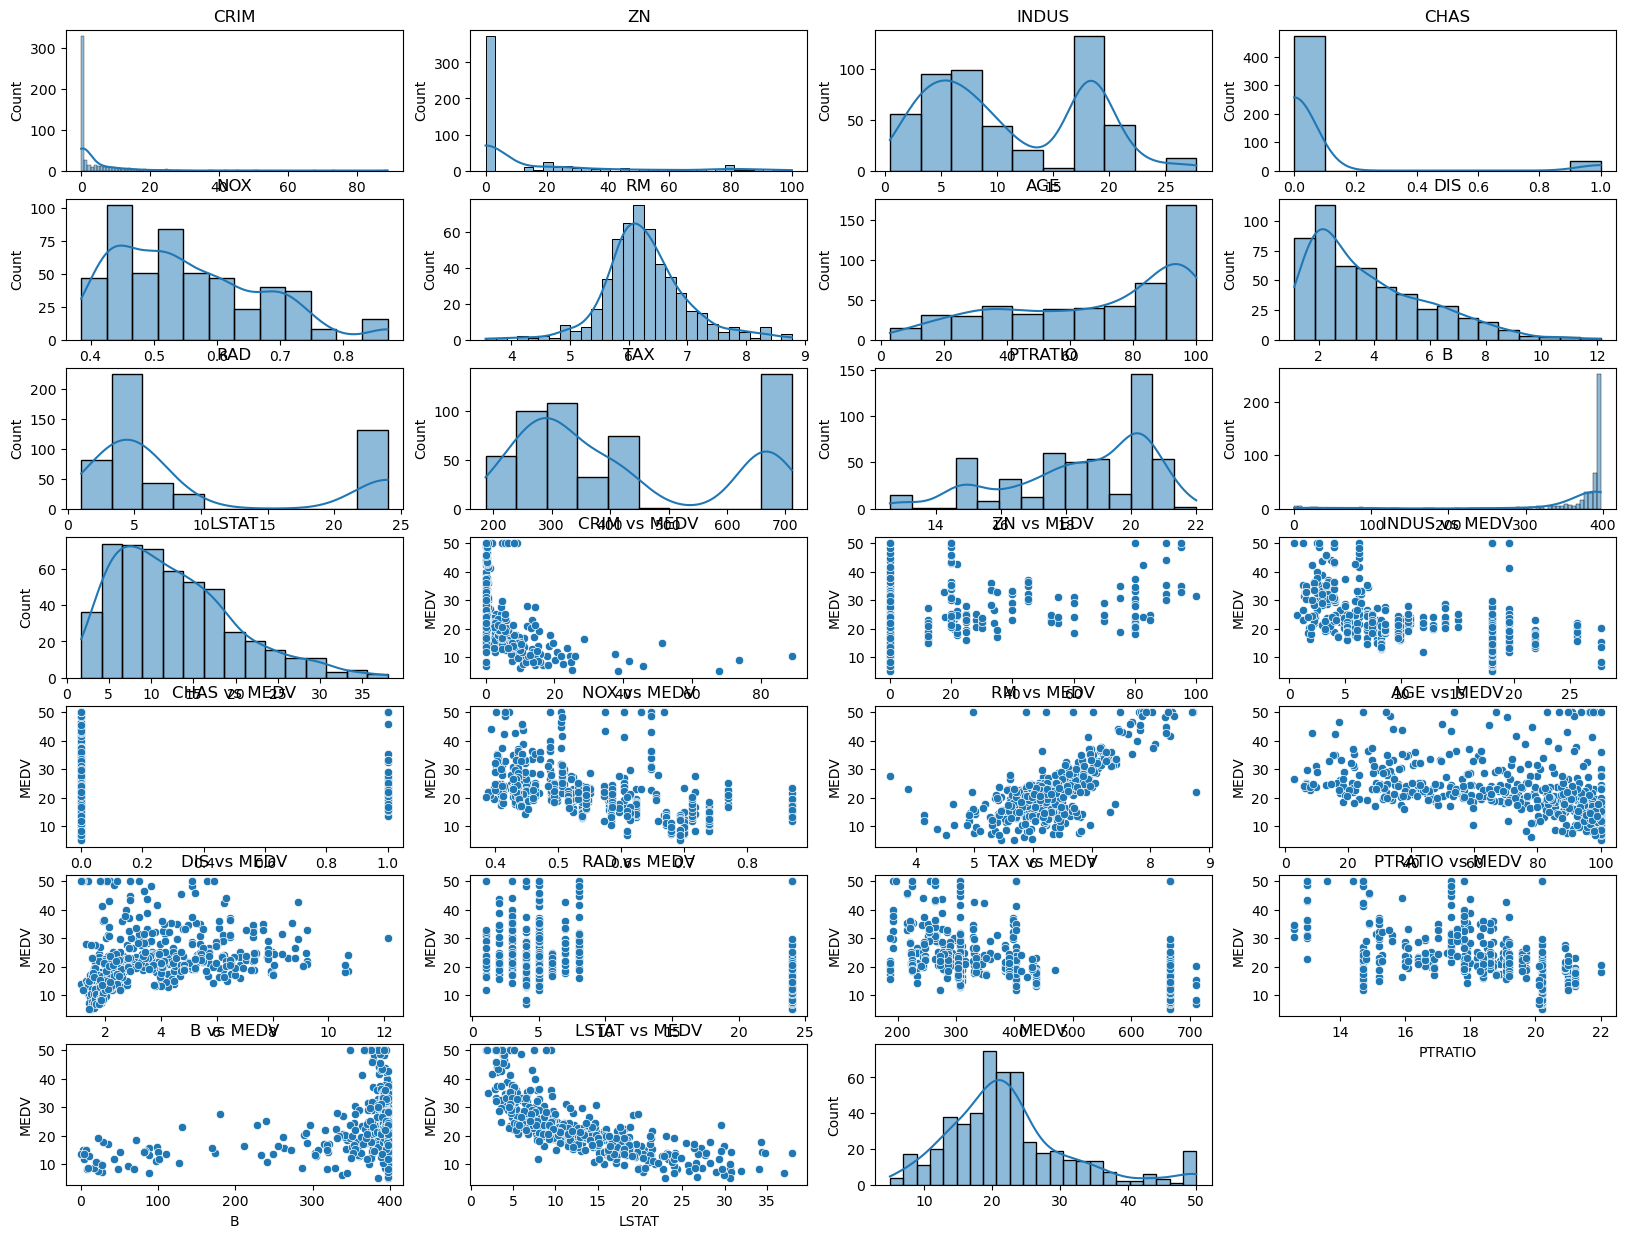

In [10]:
# Plot data
import matplotlib.pyplot as plt
import seaborn as sns


def plot_data(X, y, cols=4):
    fig, axs = plt.subplots(
        (X.shape[1]+X.shape[1]*y.shape[1] + y.shape[1]+cols-1)//cols, cols, figsize=(20, 15))
    axs = axs.flatten()

    a = 0
    for i, col in enumerate(X.columns):
        data = X[col].to_numpy()
        ax = axs[a+i]
        sns.histplot(data, kde=True, ax=ax)
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.tick_params(axis="both", which="major")
        ax.tick_params(axis="both", which="minor")
    a += i + 1
    for i, col in enumerate(X.columns):
        data = X[col].to_numpy()
        for j, ycol in enumerate(y.columns):
            ax = axs[a+i+j*y.shape[1]]
            sns.scatterplot(x=data, y=y[ycol], ax=ax)
            ax.set_title(f"{col} vs {ycol}")
            ax.set_xlabel(col)
            ax.set_ylabel(ycol)
    a += i + 1
    for i, col in enumerate(y.columns):
        data = y[col].to_numpy()
        ax = axs[a+i]
        sns.histplot(data, kde=True, ax=ax)
        ax.set_title(col)
    a += i+1
    for j in range(a, len(axs)):
        fig.delaxes(axs[j])

    # fig.tight_layout()
    return fig
    
fig = plot_data(X, y)
fig.savefig(f"{output_folder}/data.png")
fig.show()

In [11]:
# Define search
from optuna.integration.sklearn import OptunaSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    TargetEncoder,
)

CATEGORICAL_PREPROCESSORS = {
    "drop": "drop",
    "ordinal": OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
    "one_hot": OneHotEncoder(
        handle_unknown="ignore", max_categories=20, sparse_output=False
    ),
    "target": TargetEncoder(target_type="continuous"),
}

SCALERS = {
    "identity": None,
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler(),
    "quantile": QuantileTransformer(),
}

search_params = {
    "cv": 5,
    "n_jobs": -1,  # -1,
    "n_trials": 5, # 1
    # "n_trials": None,
    "random_state": 42,
    "return_train_score": True,
    "scoring": "neg_mean_squared_error",  # r2
    # "timeout": 10,
    # "timeout": None,
    "verbose": 0,
}


def search(
    model,
    param_grid={},
    categorical_preprocessor="drop",
    scaler="identity",
    search_params=search_params,
):
    search_params = search_params.copy()
    # search_params["n_trials"] = int(4**len(param_grid))

    numerical_features = X.select_dtypes(include=["number"]).columns
    categorical_features = X.select_dtypes(include=["object", "category"]).columns
    preprocessor = ColumnTransformer(
        [
            ("numerical", "passthrough", numerical_features),
            (
                "categorical",
                CATEGORICAL_PREPROCESSORS[categorical_preprocessor],
                categorical_features,
            ),
        ]
    )

    return OptunaSearchCV(
        Pipeline(
            [
                ("categorical_preprocessor", preprocessor),
                ("scaler", SCALERS[scaler]),
                ("model", model),
            ]
        ),
        {f"model__{k}": v for k, v in param_grid.items()},
        **search_params,
    )

In [12]:
# Define search grids
from optuna.distributions import (
    CategoricalDistribution,
    FloatDistribution,
    IntDistribution,
)

mlp_sk_param_grid = {
    "learning_rate_init": FloatDistribution(1e-2, 1e-1, log=True),
    "max_iter": IntDistribution(100, 100, log=True),
    "early_stopping": CategoricalDistribution([False]),
    "n_iter_no_change": IntDistribution(100, 100),
}

mlp_TrANN_param_grid = {
    "learning_rate_init": FloatDistribution(1e-2, 1e-1, log=True),
    "max_iter": IntDistribution(200, 200, log=True),
}

In [13]:
# from models import MLP, FONN1, FONN2, TREENN1, TREENN2
from models_sklearn import (
    Tree,
    Ensemble,
    MLP as MLP_sk,
    FONN1 as FONN1_sk,
    FONN2 as FONN2_sk,
    TREENN1 as TREENN1_sk,
    TREENN2 as TREENN2_sk,
)
from models_TrANN import (
    FONN1 as FONN1_TrANN,
    FONN2 as FONN2_TrANN,
    FONN3 as FONN3_TrANN,
    TREENN1 as TREENN1_TrANN,
    TREENN2 as TREENN2_TrANN,
    TREENN3 as TREENN3_TrANN,
)

models = {}

num_trees_input = 5
num_trees_hidden = 5
hidden_nodes = [10]
# hidden_nodes = [5, 10]

# categorical_preprocessor = ["drop", "target"]
# scalers = ["identity", "standard"]
scalers = ["identity"]
categorical_preprocessor = ["drop"]

models["Tree"] = search(Tree())
for hn in hidden_nodes:
    models[f"Ensemble_sk {hn}"] = search(Ensemble(hn))
    for c in categorical_preprocessor:
        for s in scalers:
            sk_args = (mlp_sk_param_grid, c, s)
            trann_args = (mlp_TrANN_param_grid, c, s)
            models[f"MLP_sk_{c}_{s} {hn}"] = search(MLP_sk(hn), *sk_args)
            models[f"FONN1_sk_{c}_{s} {num_trees_input} {hn}"] = search(
                FONN1_sk(num_trees_input, num_trees_input + hn), *sk_args
            )
            models[f"FONN2_sk_{c}_{s} {num_trees_hidden} {hn}"] = search(
                FONN2_sk(num_trees_hidden, num_trees_hidden + hn), *sk_args
            )
            models[f"TREENN1_sk_{c}_{s} {hn}"] = search(
                TREENN1_sk(1 + hn), *sk_args
            )
            models[f"TREENN2_sk_{c}_{s} {hn}"] = search(
                TREENN2_sk(1 + hn), *sk_args
            )
            models[f"FONN1_TrANN_{c}_{s} {num_trees_input} {hn}"] = search(
                FONN1_TrANN(hn, num_trees_input), *trann_args
            )
            models[f"FONN2_TrANN_{c}_{s} {num_trees_hidden} {hn}"] = search(
                FONN2_TrANN(hn, num_trees_hidden), *trann_args
            )
            models[f"FONN3_TrANN_{c}_{s} {num_trees_hidden} {hn}"] = search(
                FONN3_TrANN(hn, num_trees_hidden), *trann_args
            )
            models[f"TREENN1_TrANN_{c}_{s} {hn}"] = search(
                TREENN1_TrANN(hn), *trann_args
            )
            models[f"TREENN2_TrANN_{c}_{s} {hn}"] = search(
                TREENN2_TrANN(hn), *trann_args
            )
            models[f"TREENN3_TrANN_{c}_{s} {hn}"] = search(
                TREENN3_TrANN(hn), *trann_args
            )

display(models)

/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
/tmp/ipykernel_590021/2285695493.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_590021/2285695493.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_590021/2285695493.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_590021/2285695493.py:69: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  return OptunaSearchCV(
/tmp/ipykernel_590021/2285695493.py:69: Exp

{'Tree': OptunaSearchCV(cv=5,
                estimator=Pipeline(steps=[('categorical_preprocessor',
                                           ColumnTransformer(transformers=[('numerical',
                                                                            'passthrough',
                                                                            Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT'],
       dtype='object')),
                                                                           ('categorical',
                                                                            'drop',
                                                                            Index([], dtype='object'))])),
                                          ('scaler', None), ('model', Tree())]),
                n_jobs=-1, n_trials=5, param_distributions={}, random_state=42,
                return_train_score=True, scoring='neg_mean_squ

In [14]:
from sklearn.metrics import mean_squared_error

# Train and evaluate models
cv_results = {}
results = []

result_columns = [
    "model",
    "mean_fit_time",
    "mean_score_time",
    "mean_train_score",
    "mean_test_score",
    "mse",
]


def fit_model(name, model, X, y):
    print(f"Fitting {name}...")
    model.fit(X, y.to_numpy().ravel())
    result = model.cv_results_
    cv_results[name] = result
    return {
        "model": name,
        **{col: result[col][model.best_index_] for col in result},
        "mse": mean_squared_error(y, model.predict(X)),
    }


for name, model in models.items():
    results.append(fit_model(name, model, X, y))

results = pd.DataFrame(results)
results = results[result_columns]
results.to_csv(f"{output_folder}/results.csv", index=False)

[I 2025-01-30 20:44:09,522] A new study created in memory with name: no-name-b513585a-79a9-4698-9010-4d11035e6e46


Fitting Tree...


[I 2025-01-30 20:44:09,779] Trial 3 finished with value: -40.362344593282856 and parameters: {}. Best is trial 3 with value: -40.362344593282856.
[I 2025-01-30 20:44:09,793] Trial 1 finished with value: -41.56759289458357 and parameters: {}. Best is trial 3 with value: -40.362344593282856.
[I 2025-01-30 20:44:09,857] Trial 2 finished with value: -32.56182935352359 and parameters: {}. Best is trial 2 with value: -32.56182935352359.
[I 2025-01-30 20:44:09,873] Trial 0 finished with value: -53.88084624344788 and parameters: {}. Best is trial 2 with value: -32.56182935352359.
[I 2025-01-30 20:44:09,886] Trial 4 finished with value: -34.01147427683945 and parameters: {}. Best is trial 2 with value: -32.56182935352359.
[I 2025-01-30 20:44:09,909] A new study created in memory with name: no-name-71e2647f-24aa-4235-8a32-b53cd845617b


Fitting Ensemble_sk 10...


[I 2025-01-30 20:44:10,598] Trial 1 finished with value: -22.402333836148316 and parameters: {}. Best is trial 1 with value: -22.402333836148316.
[I 2025-01-30 20:44:10,709] Trial 0 finished with value: -22.079334894195302 and parameters: {}. Best is trial 0 with value: -22.079334894195302.
[I 2025-01-30 20:44:10,756] Trial 4 finished with value: -22.999245587264607 and parameters: {}. Best is trial 0 with value: -22.079334894195302.
[I 2025-01-30 20:44:10,791] Trial 2 finished with value: -23.295986767617944 and parameters: {}. Best is trial 0 with value: -22.079334894195302.
[I 2025-01-30 20:44:10,817] Trial 3 finished with value: -23.373587781013395 and parameters: {}. Best is trial 0 with value: -22.079334894195302.
[I 2025-01-30 20:44:10,907] A new study created in memory with name: no-name-c786ad0b-0a1b-42ad-90b2-3801c45c2b27


Fitting MLP_sk_drop_identity 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Fitting FONN1_sk_drop_identity 5 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Fitting FONN2_sk_drop_identity 5 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Fitting TREENN1_sk_drop_identity 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Fitting TREENN2_sk_drop_identity 10...


/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ahteh/miniconda3/envs/research/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged ye

Fitting FONN1_TrANN_drop_identity 5 10...


[I 2025-01-30 20:46:08,323] Trial 4 finished with value: -73.3110944835332 and parameters: {'model__learning_rate_init': 0.0726087350692617, 'model__max_iter': 400}. Best is trial 4 with value: -73.3110944835332.
[I 2025-01-30 20:46:09,876] Trial 0 finished with value: -78.24464592222009 and parameters: {'model__learning_rate_init': 0.013185233187800667, 'model__max_iter': 400}. Best is trial 4 with value: -73.3110944835332.
[I 2025-01-30 20:46:10,144] Trial 1 finished with value: -84.47924308828698 and parameters: {'model__learning_rate_init': 0.037860444078410126, 'model__max_iter': 400}. Best is trial 4 with value: -73.3110944835332.
[I 2025-01-30 20:46:10,257] Trial 2 finished with value: -78.38762251506253 and parameters: {'model__learning_rate_init': 0.0845063185202803, 'model__max_iter': 400}. Best is trial 4 with value: -73.3110944835332.
[I 2025-01-30 20:46:10,558] Trial 3 finished with value: -80.50036689736457 and parameters: {'model__learning_rate_init': 0.05745379106794371

Fitting FONN2_TrANN_drop_identity 5 10...


[I 2025-01-30 20:46:38,362] Trial 2 finished with value: -33.4328213607766 and parameters: {'model__learning_rate_init': 0.04191967285102129, 'model__max_iter': 400}. Best is trial 2 with value: -33.4328213607766.
[I 2025-01-30 20:46:38,865] Trial 1 finished with value: -31.051816803077013 and parameters: {'model__learning_rate_init': 0.019531862530729093, 'model__max_iter': 400}. Best is trial 1 with value: -31.051816803077013.
[I 2025-01-30 20:46:38,881] Trial 3 finished with value: -47.70963424197748 and parameters: {'model__learning_rate_init': 0.047197270886298416, 'model__max_iter': 400}. Best is trial 1 with value: -31.051816803077013.
[I 2025-01-30 20:46:38,993] Trial 4 finished with value: -37.110443820305065 and parameters: {'model__learning_rate_init': 0.031025543790415593, 'model__max_iter': 400}. Best is trial 1 with value: -31.051816803077013.
[I 2025-01-30 20:46:39,241] Trial 0 finished with value: -38.40659359925422 and parameters: {'model__learning_rate_init': 0.035658

Fitting FONN3_TrANN_drop_identity 5 10...


[I 2025-01-30 20:47:18,815] Trial 0 finished with value: -61.35749187814497 and parameters: {'model__learning_rate_init': 0.03153140092873359, 'model__max_iter': 400}. Best is trial 0 with value: -61.35749187814497.
[I 2025-01-30 20:47:18,998] Trial 1 finished with value: -63.05043209110259 and parameters: {'model__learning_rate_init': 0.02749263817891062, 'model__max_iter': 400}. Best is trial 0 with value: -61.35749187814497.
[I 2025-01-30 20:47:19,017] Trial 2 finished with value: -64.01332430458561 and parameters: {'model__learning_rate_init': 0.014619459503331005, 'model__max_iter': 400}. Best is trial 0 with value: -61.35749187814497.
[I 2025-01-30 20:47:19,304] Trial 3 finished with value: -59.56330156780149 and parameters: {'model__learning_rate_init': 0.03361321569797657, 'model__max_iter': 400}. Best is trial 3 with value: -59.56330156780149.
[I 2025-01-30 20:47:19,513] Trial 4 finished with value: -69.145510035573 and parameters: {'model__learning_rate_init': 0.0798642247863

Fitting TREENN1_TrANN_drop_identity 10...


[I 2025-01-30 20:47:42,606] Trial 3 finished with value: -69.48149496311635 and parameters: {'model__learning_rate_init': 0.022041845331712565, 'model__max_iter': 400}. Best is trial 3 with value: -69.48149496311635.
[I 2025-01-30 20:47:42,615] Trial 2 finished with value: -75.69058200711638 and parameters: {'model__learning_rate_init': 0.011174760511565969, 'model__max_iter': 400}. Best is trial 3 with value: -69.48149496311635.
[I 2025-01-30 20:47:42,661] Trial 0 finished with value: -90.09456939118847 and parameters: {'model__learning_rate_init': 0.031177807162398756, 'model__max_iter': 400}. Best is trial 3 with value: -69.48149496311635.
[I 2025-01-30 20:47:42,790] Trial 4 finished with value: -80.23278510564543 and parameters: {'model__learning_rate_init': 0.04566711314437626, 'model__max_iter': 400}. Best is trial 3 with value: -69.48149496311635.
[I 2025-01-30 20:47:43,266] Trial 1 finished with value: -78.53180641718394 and parameters: {'model__learning_rate_init': 0.018928838

Fitting TREENN2_TrANN_drop_identity 10...


[I 2025-01-30 20:47:58,676] Trial 1 finished with value: -38.08527991618922 and parameters: {'model__learning_rate_init': 0.09591779980277466, 'model__max_iter': 400}. Best is trial 1 with value: -38.08527991618922.
[I 2025-01-30 20:48:01,568] Trial 2 finished with value: -38.30640969985616 and parameters: {'model__learning_rate_init': 0.07574220864406486, 'model__max_iter': 400}. Best is trial 1 with value: -38.08527991618922.
[I 2025-01-30 20:48:02,194] Trial 3 finished with value: -38.843609023750375 and parameters: {'model__learning_rate_init': 0.037984497310159133, 'model__max_iter': 400}. Best is trial 1 with value: -38.08527991618922.
[I 2025-01-30 20:48:02,632] Trial 0 finished with value: -38.23046255551103 and parameters: {'model__learning_rate_init': 0.05516743123978709, 'model__max_iter': 400}. Best is trial 1 with value: -38.08527991618922.
[I 2025-01-30 20:48:02,866] Trial 4 finished with value: -38.02048226215602 and parameters: {'model__learning_rate_init': 0.0242071174

Fitting TREENN3_TrANN_drop_identity 10...


[I 2025-01-30 20:48:15,005] Trial 4 finished with value: -75.42885151623403 and parameters: {'model__learning_rate_init': 0.01621248845164278, 'model__max_iter': 400}. Best is trial 4 with value: -75.42885151623403.
[I 2025-01-30 20:48:15,291] Trial 1 finished with value: -65.35716147588256 and parameters: {'model__learning_rate_init': 0.029854774439721517, 'model__max_iter': 400}. Best is trial 1 with value: -65.35716147588256.
[I 2025-01-30 20:48:15,366] Trial 3 finished with value: -71.30254097845989 and parameters: {'model__learning_rate_init': 0.013712775700442683, 'model__max_iter': 400}. Best is trial 1 with value: -65.35716147588256.
[I 2025-01-30 20:48:16,211] Trial 2 finished with value: -77.05405112466651 and parameters: {'model__learning_rate_init': 0.011697047070555704, 'model__max_iter': 400}. Best is trial 1 with value: -65.35716147588256.
[I 2025-01-30 20:48:16,848] Trial 0 finished with value: -74.89083449494524 and parameters: {'model__learning_rate_init': 0.047217604

In [15]:
display(
    results,
    results.sort_values(by="mean_test_score", ascending=False),
    results.sort_values(by="mean_train_score", ascending=False),
    results.sort_values(by="mse", ascending=True),
)

,model,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,mse
0,Tree,0.035929,0.014706,-8.701921,-32.561829,6.338794
1,Ensemble_sk 10,0.103987,0.013155,-2.131027,-22.079335,1.886991
2,MLP_sk_drop_identity 10,4.995580,0.057215,-52.291044,-64.255998,35.758953
3,FONN1_sk_drop_identity 5 10,2.309973,0.020766,-4.839741,-25.644027,3.047674
4,FONN2_sk_drop_identity 5 10,4.504878,0.025093,-57.868037,-90.782794,52.374161
5,TREENN1_sk_drop_identity 10,1.849545,0.012733,-8.189729,-29.306355,13.048194
6,TREENN2_sk_drop_identity 10,2.208782,0.002726,-58.317839,-93.726297,50.262470
7,FONN1_TrANN_drop_identity 5 10,6.436358,0.020221,-60.359098,-73.311094,77.677841
8,FONN2_TrANN_drop_identity 5 10,5.418891,0.011058,-7.084311,-31.051817,6.932321
9,FONN3_TrANN_drop_identity 5 10,7.761681,0.018569,-37.307549,-59.563302,42.648246


,model,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,mse
1,Ensemble_sk 10,0.103987,0.013155,-2.131027,-22.079335,1.886991
3,FONN1_sk_drop_identity 5 10,2.309973,0.020766,-4.839741,-25.644027,3.047674
5,TREENN1_sk_drop_identity 10,1.849545,0.012733,-8.189729,-29.306355,13.048194
8,FONN2_TrANN_drop_identity 5 10,5.418891,0.011058,-7.084311,-31.051817,6.932321
0,Tree,0.035929,0.014706,-8.701921,-32.561829,6.338794
11,TREENN2_TrANN_drop_identity 10,3.759758,0.008502,-5.983531,-38.020482,6.906792
9,FONN3_TrANN_drop_identity 5 10,7.761681,0.018569,-37.307549,-59.563302,42.648246
2,MLP_sk_drop_identity 10,4.995580,0.057215,-52.291044,-64.255998,35.758953
12,TREENN3_TrANN_drop_identity 10,2.345205,0.003242,-58.076769,-65.357161,53.870675
10,TREENN1_TrANN_drop_identity 10,4.326054,0.007687,-66.500398,-69.481495,77.088568


,model,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,mse
1,Ensemble_sk 10,0.103987,0.013155,-2.131027,-22.079335,1.886991
3,FONN1_sk_drop_identity 5 10,2.309973,0.020766,-4.839741,-25.644027,3.047674
11,TREENN2_TrANN_drop_identity 10,3.759758,0.008502,-5.983531,-38.020482,6.906792
8,FONN2_TrANN_drop_identity 5 10,5.418891,0.011058,-7.084311,-31.051817,6.932321
5,TREENN1_sk_drop_identity 10,1.849545,0.012733,-8.189729,-29.306355,13.048194
0,Tree,0.035929,0.014706,-8.701921,-32.561829,6.338794
9,FONN3_TrANN_drop_identity 5 10,7.761681,0.018569,-37.307549,-59.563302,42.648246
2,MLP_sk_drop_identity 10,4.995580,0.057215,-52.291044,-64.255998,35.758953
4,FONN2_sk_drop_identity 5 10,4.504878,0.025093,-57.868037,-90.782794,52.374161
12,TREENN3_TrANN_drop_identity 10,2.345205,0.003242,-58.076769,-65.357161,53.870675


,model,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,mse
1,Ensemble_sk 10,0.103987,0.013155,-2.131027,-22.079335,1.886991
3,FONN1_sk_drop_identity 5 10,2.309973,0.020766,-4.839741,-25.644027,3.047674
0,Tree,0.035929,0.014706,-8.701921,-32.561829,6.338794
11,TREENN2_TrANN_drop_identity 10,3.759758,0.008502,-5.983531,-38.020482,6.906792
8,FONN2_TrANN_drop_identity 5 10,5.418891,0.011058,-7.084311,-31.051817,6.932321
5,TREENN1_sk_drop_identity 10,1.849545,0.012733,-8.189729,-29.306355,13.048194
2,MLP_sk_drop_identity 10,4.995580,0.057215,-52.291044,-64.255998,35.758953
9,FONN3_TrANN_drop_identity 5 10,7.761681,0.018569,-37.307549,-59.563302,42.648246
6,TREENN2_sk_drop_identity 10,2.208782,0.002726,-58.317839,-93.726297,50.262470
4,FONN2_sk_drop_identity 5 10,4.504878,0.025093,-57.868037,-90.782794,52.374161


In [16]:
pd.DataFrame({name: model.best_params_ for name,
             model in models.items()}).transpose()

,model__learning_rate_init,model__max_iter,model__early_stopping,model__n_iter_no_change
Tree,NaN,NaN,NaN,NaN
Ensemble_sk 10,NaN,NaN,NaN,NaN
MLP_sk_drop_identity 10,0.0124,100,False,100
FONN1_sk_drop_identity 5 10,0.087568,100,False,100
FONN2_sk_drop_identity 5 10,0.064433,100,False,100
TREENN1_sk_drop_identity 10,0.047071,100,False,100
TREENN2_sk_drop_identity 10,0.017765,100,False,100
FONN1_TrANN_drop_identity 5 10,0.072609,400.0,NaN,NaN
FONN2_TrANN_drop_identity 5 10,0.019532,400.0,NaN,NaN
FONN3_TrANN_drop_identity 5 10,0.033613,400.0,NaN,NaN


In [17]:
# Predictions

predictions = pd.DataFrame(
    {name: model.best_estimator_.predict(X).ravel() for name, model in models.items()}
)
predictions = pd.concat([y, predictions], axis=1)
predictions.to_csv(f"{output_folder}/predictions.csv", index=False)
predictions.describe().to_csv(f"{output_folder}/predictions_stats.csv", index=True)

display(predictions, predictions.describe())

,MEDV,Tree,Ensemble_sk 10,MLP_sk_drop_identity 10,FONN1_sk_drop_identity 5 10,FONN2_sk_drop_identity 5 10,TREENN1_sk_drop_identity 10,TREENN2_sk_drop_identity 10,FONN1_TrANN_drop_identity 5 10,FONN2_TrANN_drop_identity 5 10,FONN3_TrANN_drop_identity 5 10,TREENN1_TrANN_drop_identity 10,TREENN2_TrANN_drop_identity 10,TREENN3_TrANN_drop_identity 10
0,24.0,24.0,25.88,33.376619,24.179664,28.745898,25.460708,34.595946,23.08671,25.376472,24.010302,23.261347,26.360789,25.153921
1,21.6,21.6,21.88,28.080840,21.850981,26.446365,24.053849,29.384253,23.08671,20.813492,22.534169,23.261347,21.378512,24.563468
2,34.7,32.7,34.85,30.742860,35.468901,27.779223,35.064326,32.573933,23.08671,33.523567,26.277336,23.261347,34.012534,26.060734
3,33.4,33.4,32.59,30.219363,33.794329,27.407640,34.519830,31.506342,23.08671,33.523567,26.277336,23.261347,34.012534,26.060734
4,36.2,32.7,35.75,29.081600,34.035618,26.897826,30.624474,30.638829,23.08671,33.523567,26.277336,23.261347,34.012534,26.060734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,22.0,22.09,25.947012,19.948168,24.838346,23.661776,28.110353,23.08671,25.825760,24.010302,23.261347,26.360789,25.153921
502,20.6,22.0,20.55,27.564544,18.809543,26.020740,25.909877,29.026326,23.08671,20.813492,22.534169,23.261347,21.378512,24.563468
503,23.9,23.9,24.60,31.624901,28.923650,29.133530,26.007753,33.758460,23.08671,29.552964,25.107978,23.261347,30.065690,25.592991
504,22.0,22.0,23.96,30.274088,28.103556,28.232254,25.479484,32.403725,23.08671,25.825760,24.010302,23.261347,26.360789,25.153921


,MEDV,Tree,Ensemble_sk 10,MLP_sk_drop_identity 10,FONN1_sk_drop_identity 5 10,FONN2_sk_drop_identity 5 10,TREENN1_sk_drop_identity 10,TREENN2_sk_drop_identity 10,FONN1_TrANN_drop_identity 5 10,FONN2_TrANN_drop_identity 5 10,FONN3_TrANN_drop_identity 5 10,TREENN1_TrANN_drop_identity 10,TREENN2_TrANN_drop_identity 10,TREENN3_TrANN_drop_identity 10
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,22.465810,22.457688,22.565737,22.434394,21.515584,22.250030,26.032081,22.569335,21.924437,22.555462,22.560210,22.665199,22.556098
std,9.197104,8.891809,8.757623,7.123842,9.056373,8.213573,8.589490,7.520197,1.871251,8.679167,3.264584,2.516926,8.595642,4.132941
min,5.000000,5.000000,5.200000,-6.539609,2.831654,-0.344077,2.428026,-3.069087,15.814691,8.580114,13.452209,13.392223,10.043017,4.443926
25%,17.025000,17.400000,17.137500,18.639185,16.827662,19.073412,17.216171,22.824774,23.086710,16.764620,21.474383,23.261347,17.801498,18.382863
50%,21.200000,21.400000,21.215000,22.873097,21.001461,23.276669,21.264977,26.504029,23.086710,20.363167,22.534169,23.261347,21.378512,24.563468
75%,25.000000,25.000000,25.335000,27.759013,25.631414,26.647853,25.472868,30.833273,23.086710,25.286945,24.010302,23.261347,26.360789,24.904298
max,50.000000,50.000000,50.000000,39.770006,49.962783,36.283055,47.740275,43.701849,23.086710,48.808319,30.774555,23.261347,48.932989,27.828968


MemoryError: Unable to allocate 43.0 TiB for an array with shape (5912430451095,) and data type float64

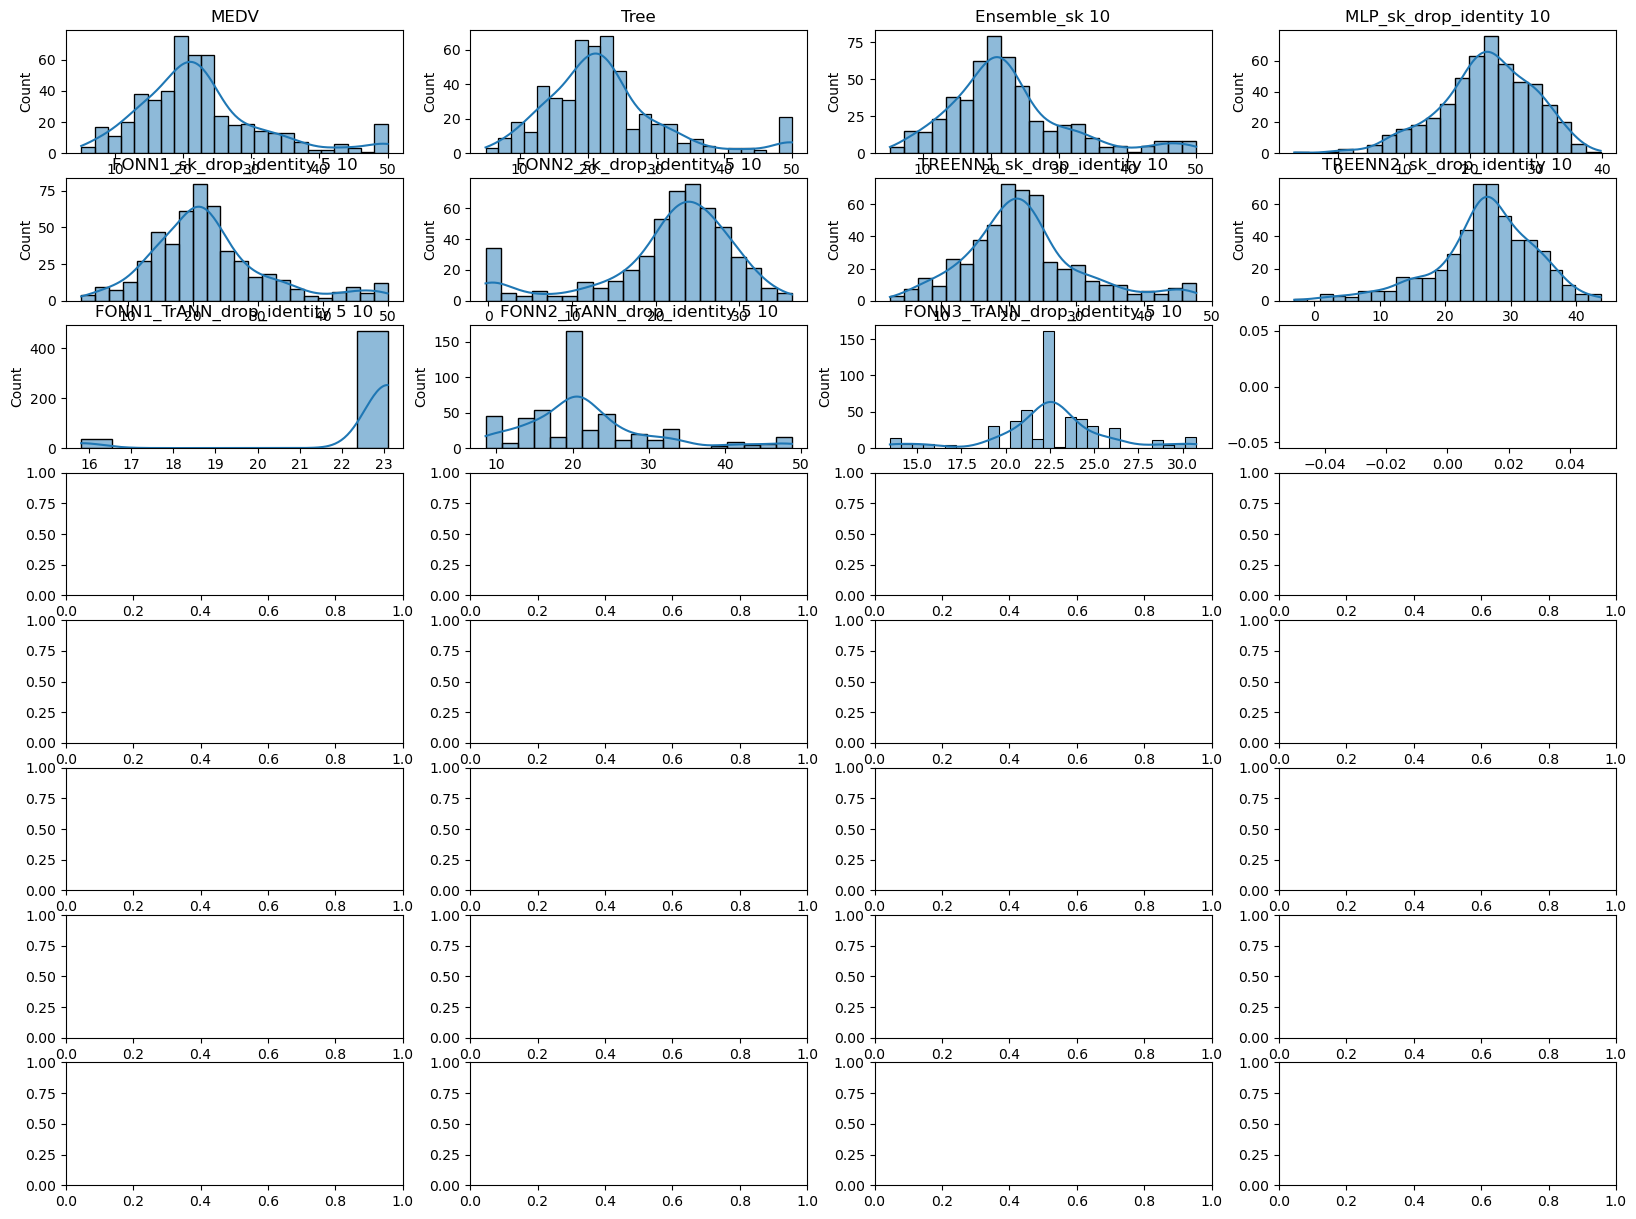

In [18]:
# Plot Predictions
fig = plot_data(predictions, y)
fig.savefig(f"{output_folder}/predictions.png")

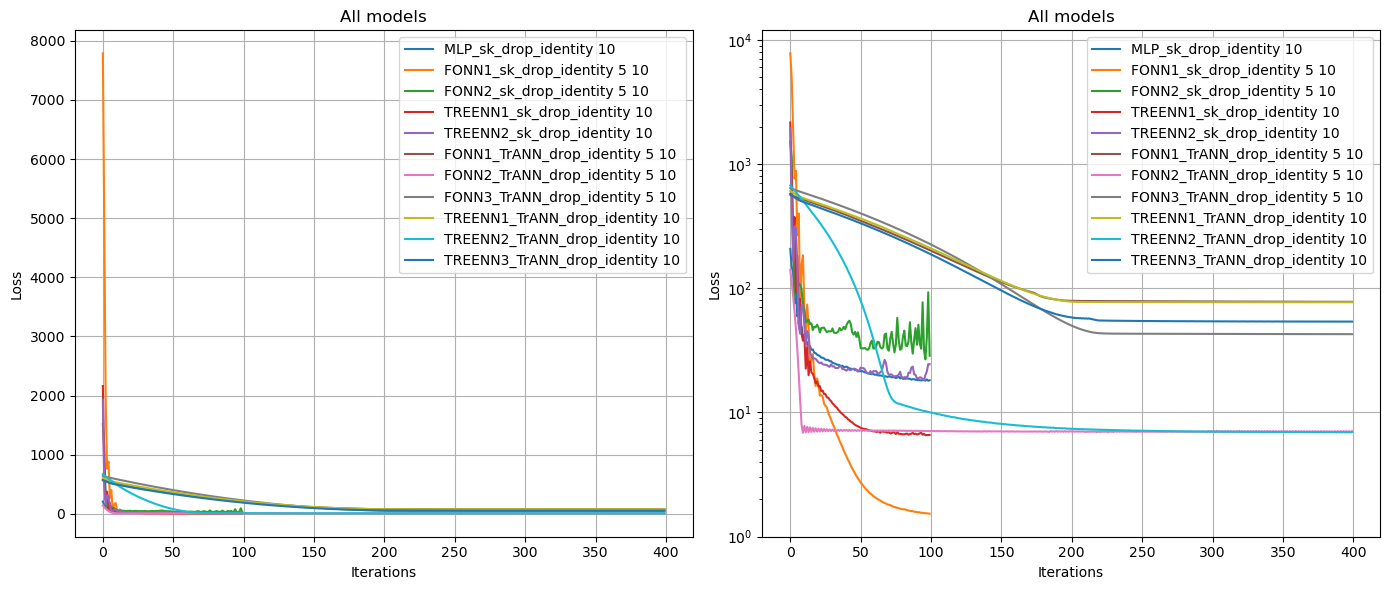

In [19]:
# Plot all models

def plot_loss(model, ax1, ax2, label):
    ax1.plot(model.loss_curve_, label=label)
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Loss")
    ax1.grid(True)

    ax2.plot(model.loss_curve_, label=label)
    ax2.set_yscale("log")
    ax2.set_xlabel("Iterations")
    ax2.set_ylabel("Loss")
    ax2.grid(True)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

for model_name, model in models.items():
    if hasattr(model.best_estimator_["model"], "loss_curve_"):
        plot_loss(model.best_estimator_["model"], ax1, ax2, label=model_name)

ax1.set_xlabel("Iterations")
ax1.set_ylabel("Loss")
ax1.set_title("All models")
ax1.legend()
ax1.grid(True)

ax2.set_yscale("log")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Loss")
ax2.set_title("All models")
ax2.legend()
ax2.grid(True)

fig.tight_layout()
fig.savefig(f"{output_folder}/models/models.png")
fig.show()

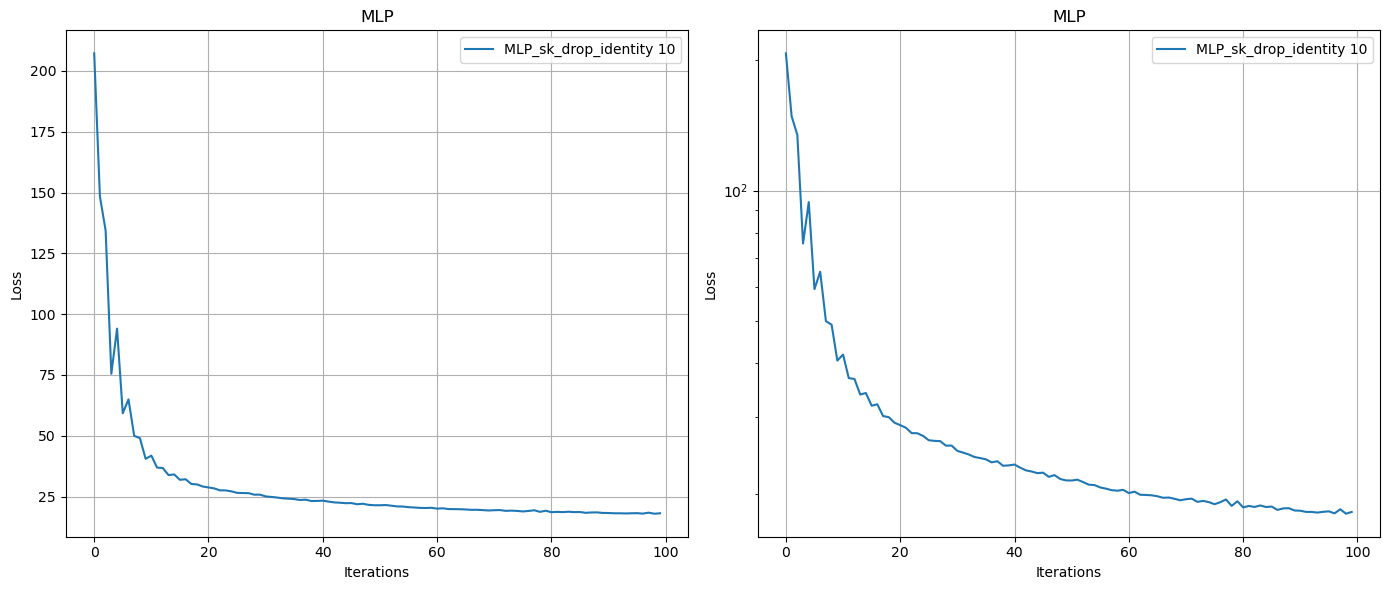

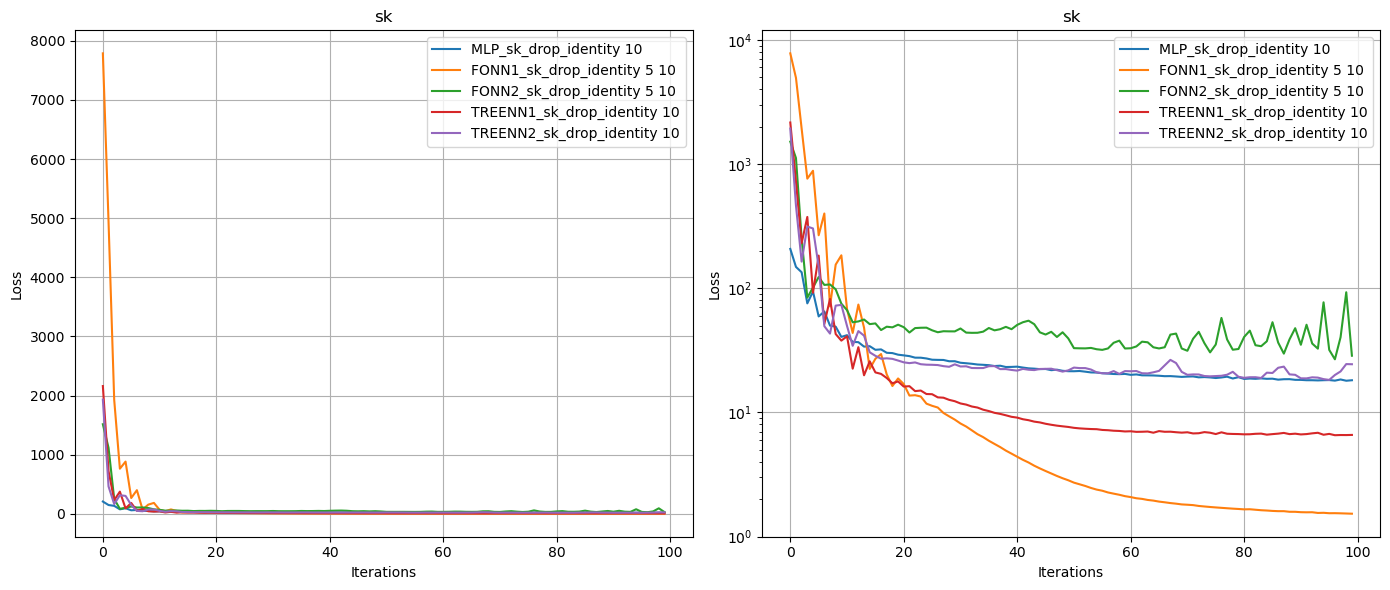

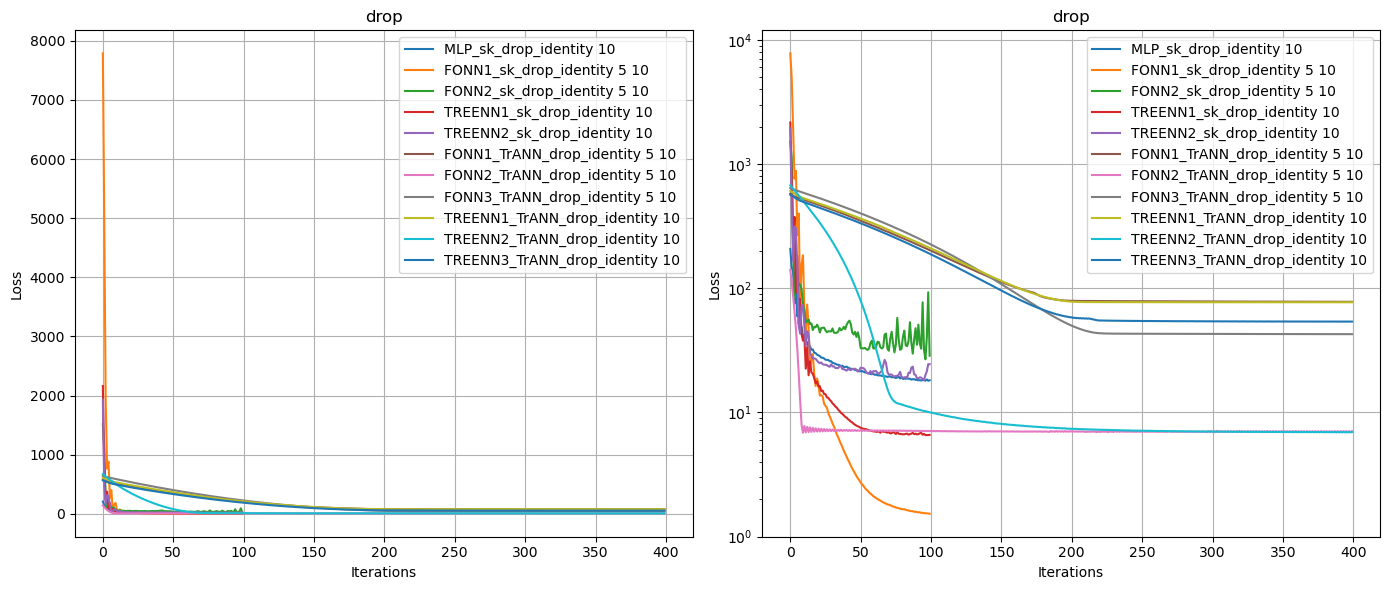

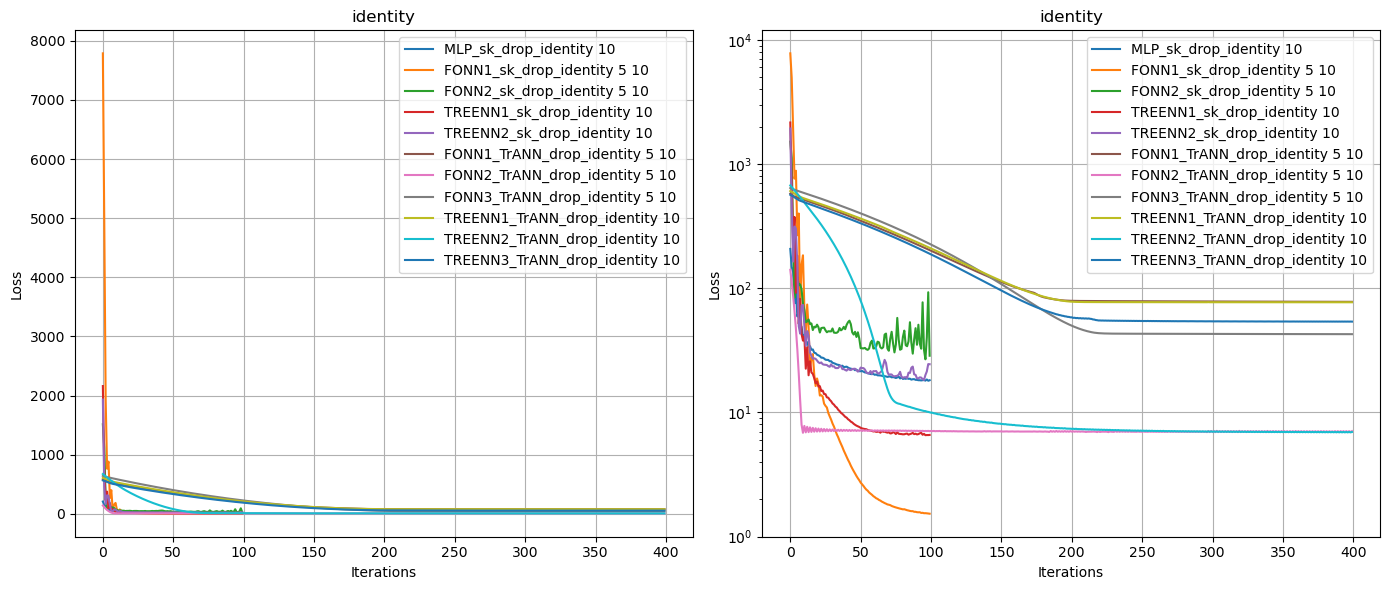

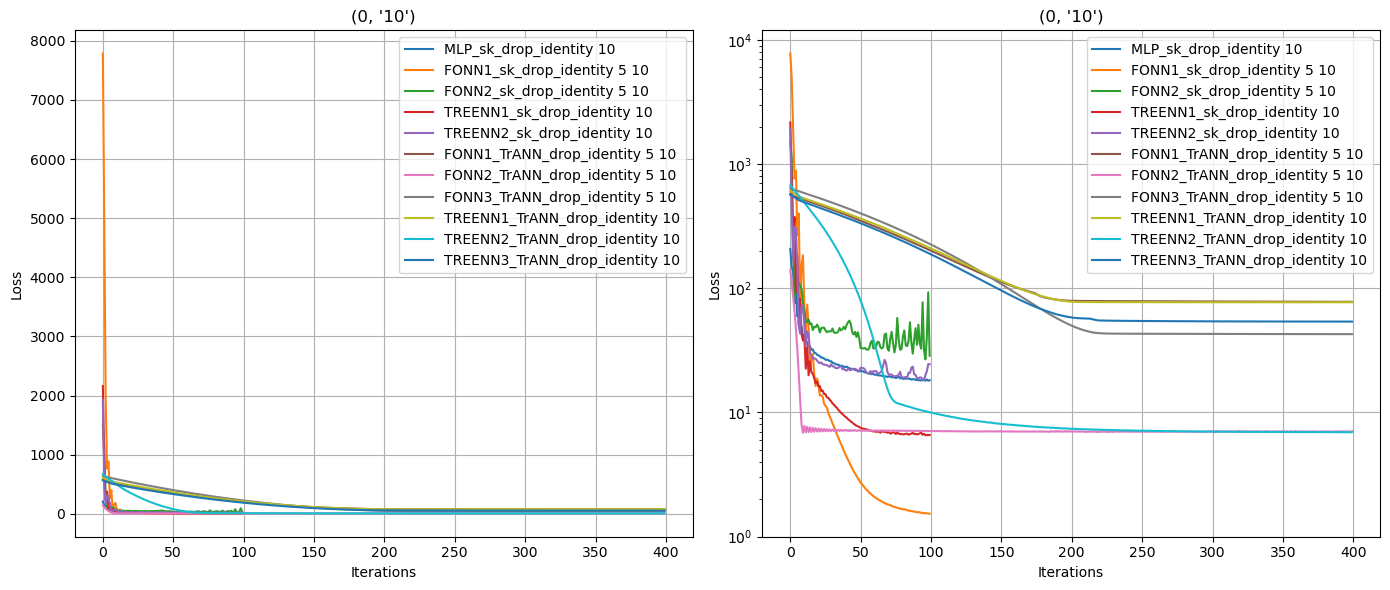

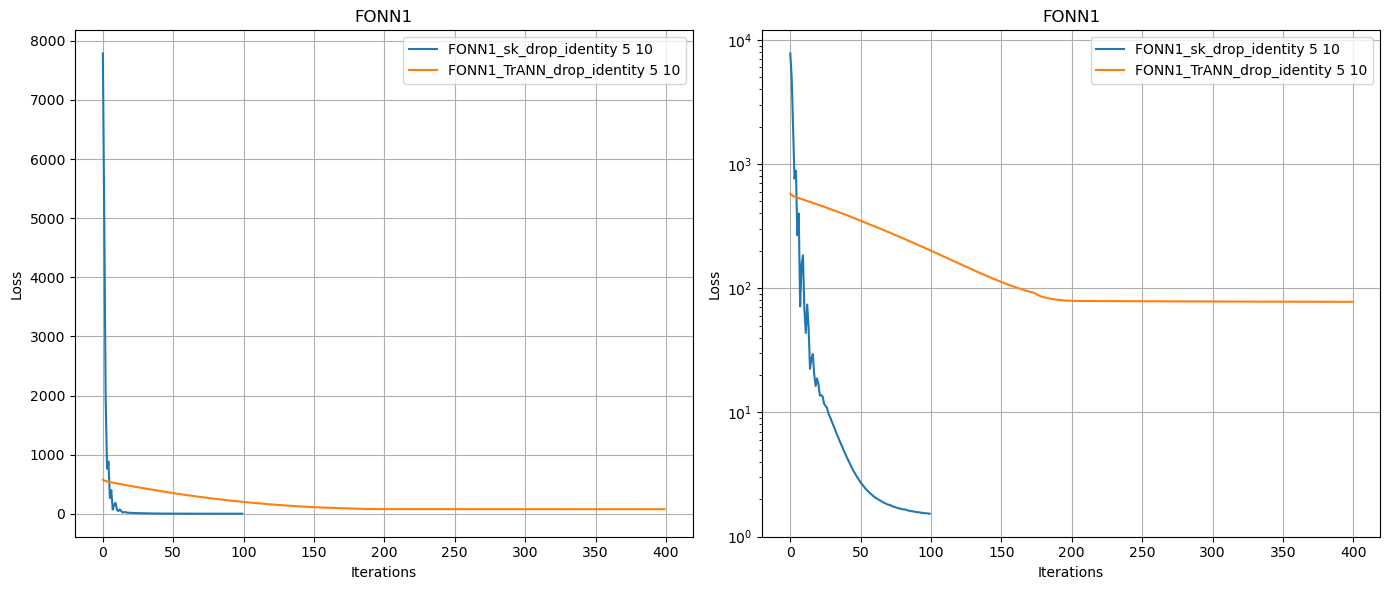

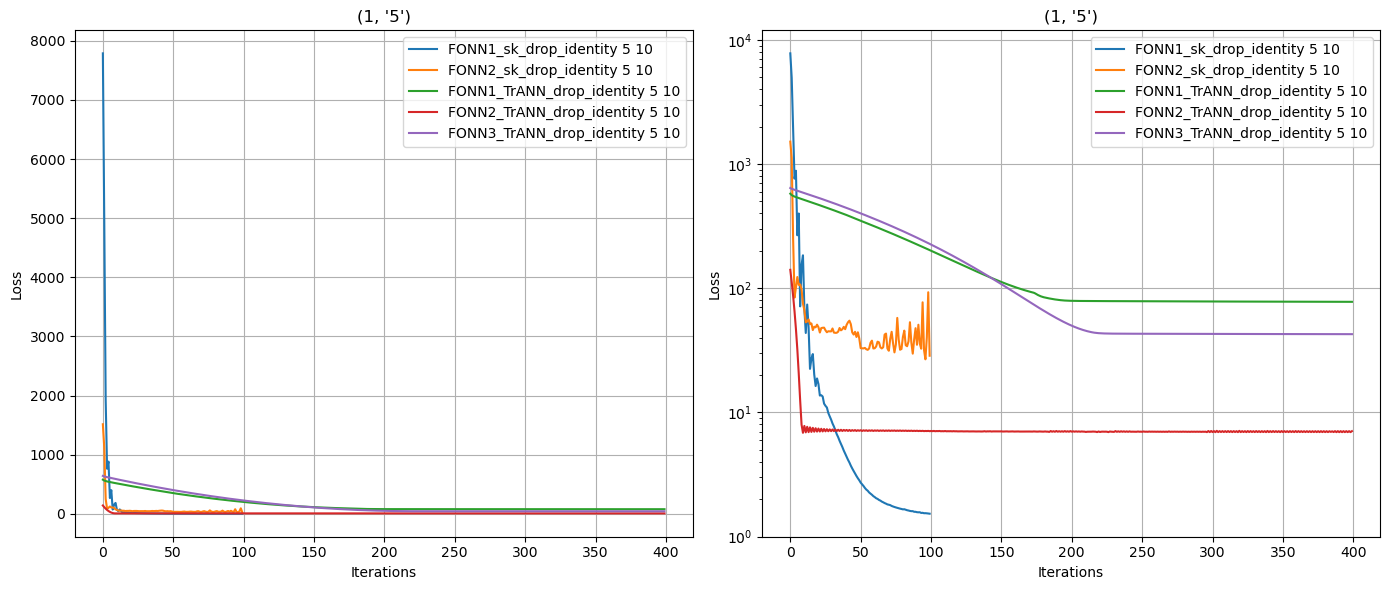

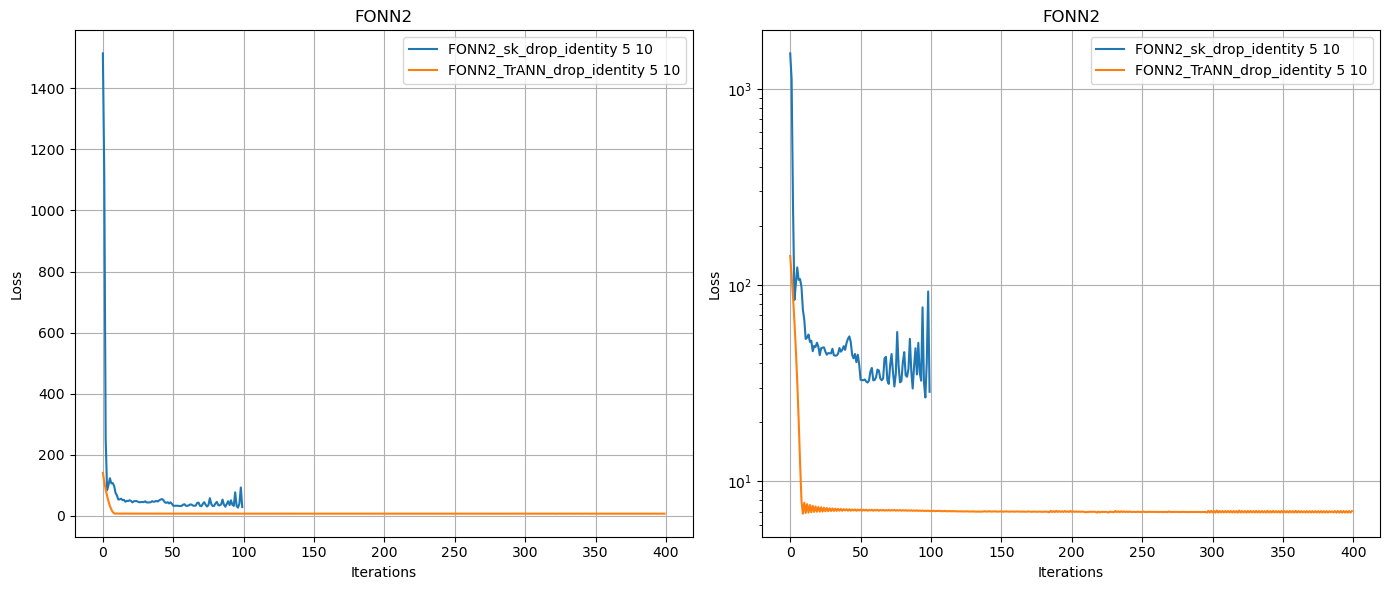

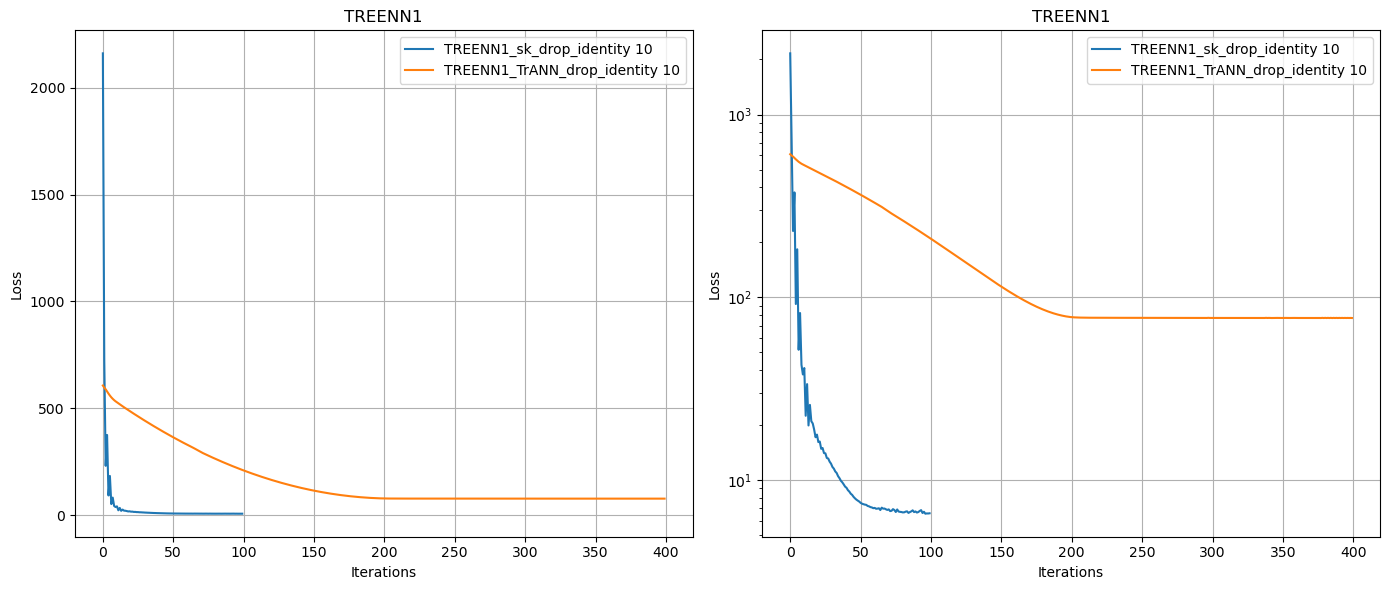

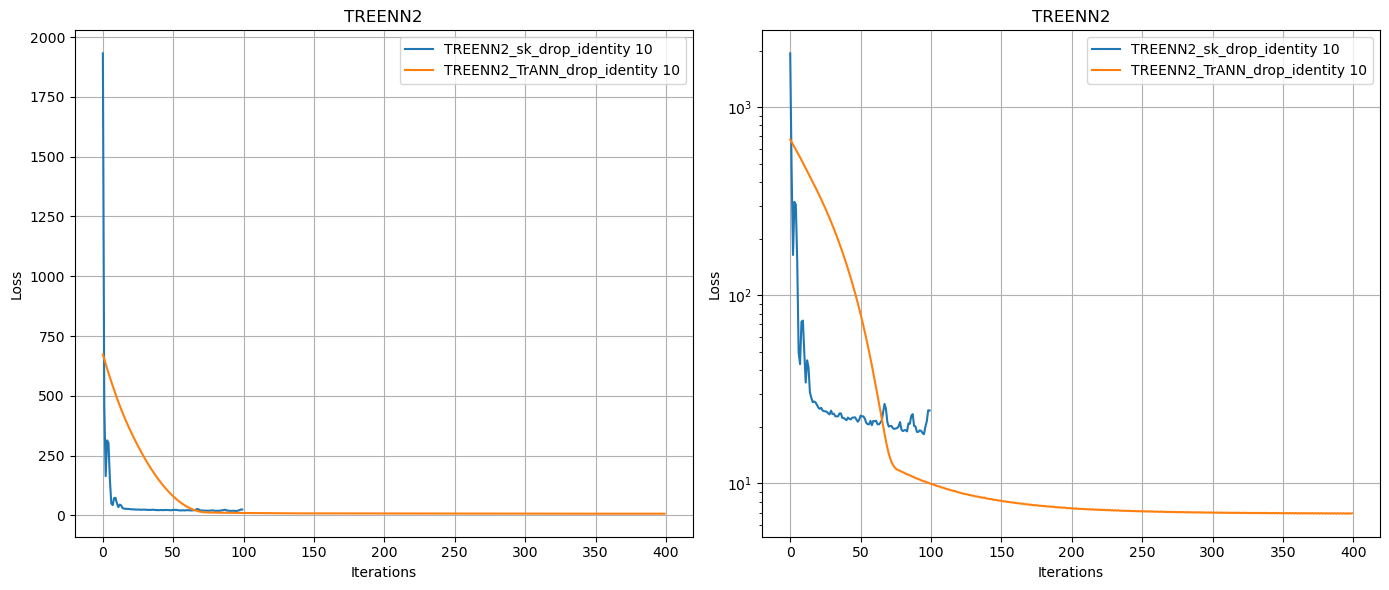

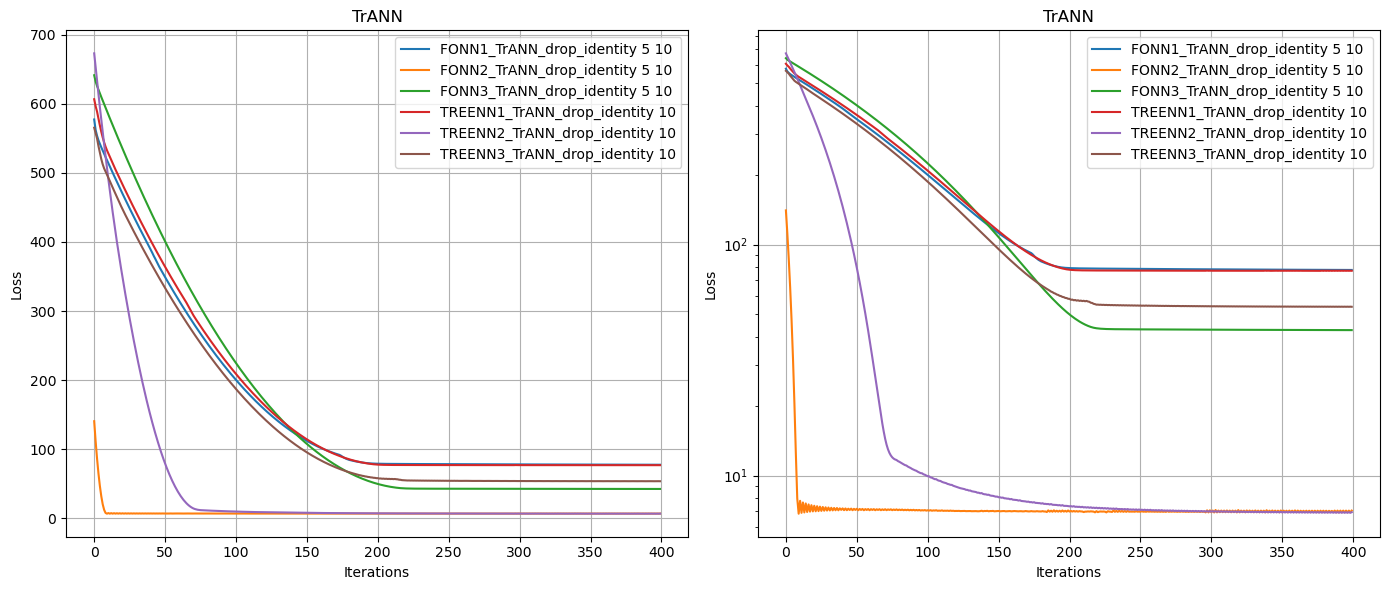

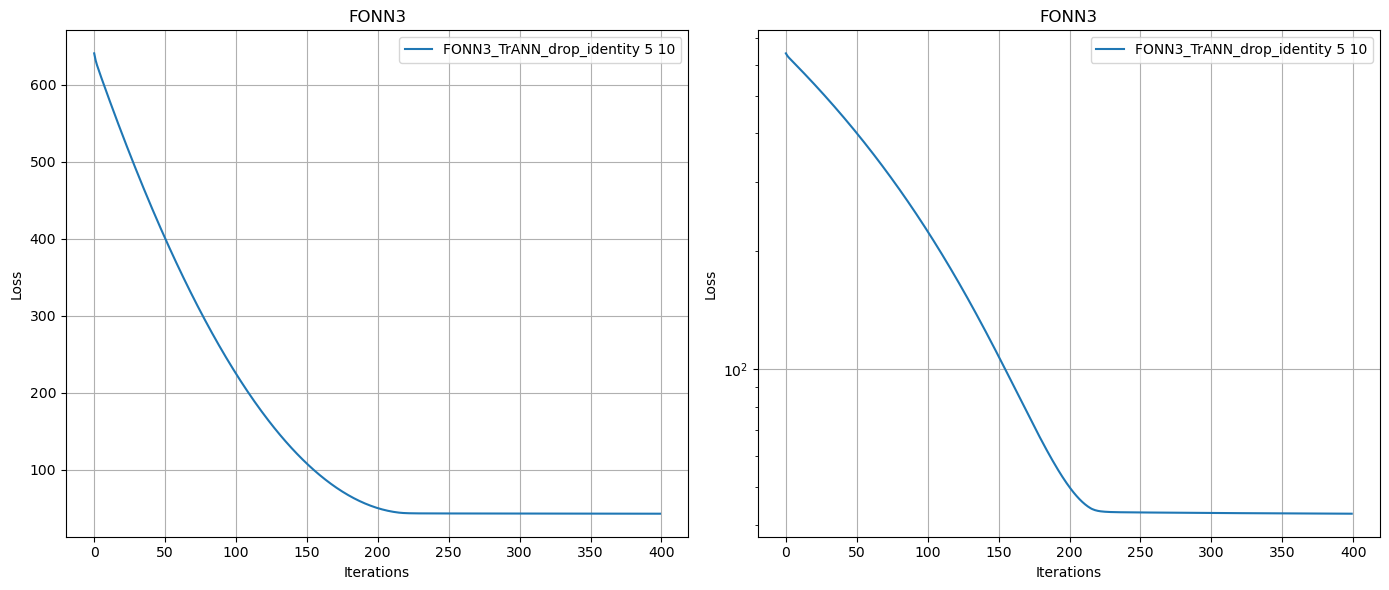

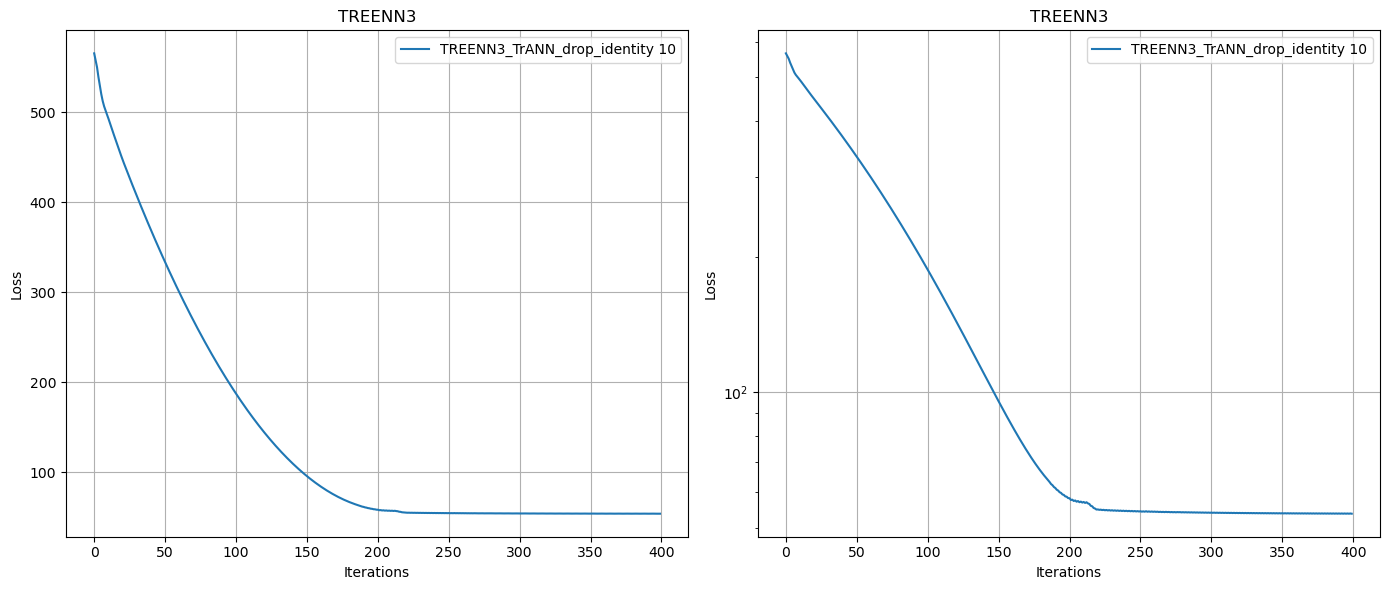

In [20]:
# Plot model groups

plot_groups = {}
for model_name, model in models.items():
    if hasattr(model.best_estimator_["model"], "loss_curve_"):
        keys = model_name.split(" ")[0].split("_") + list(enumerate(model_name.split(" ")[-1:0:-1]))
        for key in keys:
            if key not in plot_groups:
                plot_groups[key] = plt.subplots(1, 2, figsize=(14, 6))
            fig, (ax1, ax2) = plot_groups[key]
            plot_loss(model.best_estimator_["model"], ax1, ax2, model_name)

for group, plot in plot_groups.items():
    fig, (ax1, ax2) = plot
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Loss")
    ax1.set_title(group)
    ax1.legend()
    ax1.grid(True)

    ax2.set_yscale("log")
    ax2.set_xlabel("Iterations")
    ax2.set_ylabel("Loss")
    ax2.set_title(group)
    ax2.legend()
    ax2.grid(True)

    fig.tight_layout()
    fig.savefig(f"{output_folder}/models/group_{group}.png")
    fig.show()

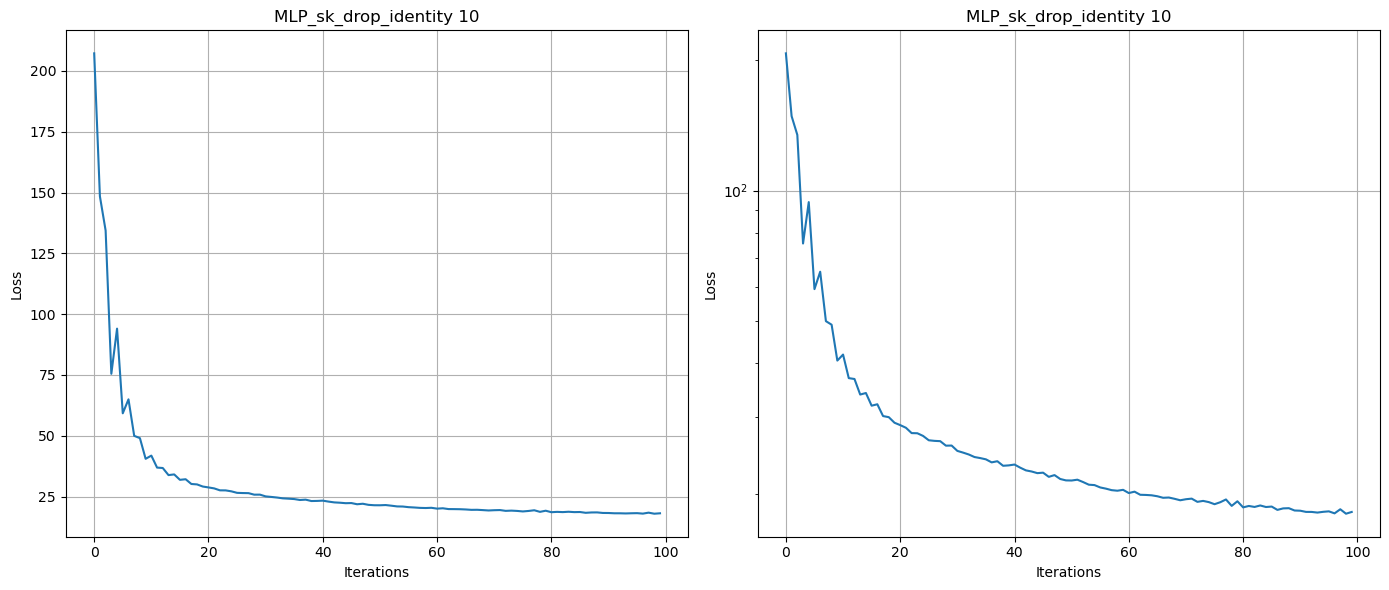

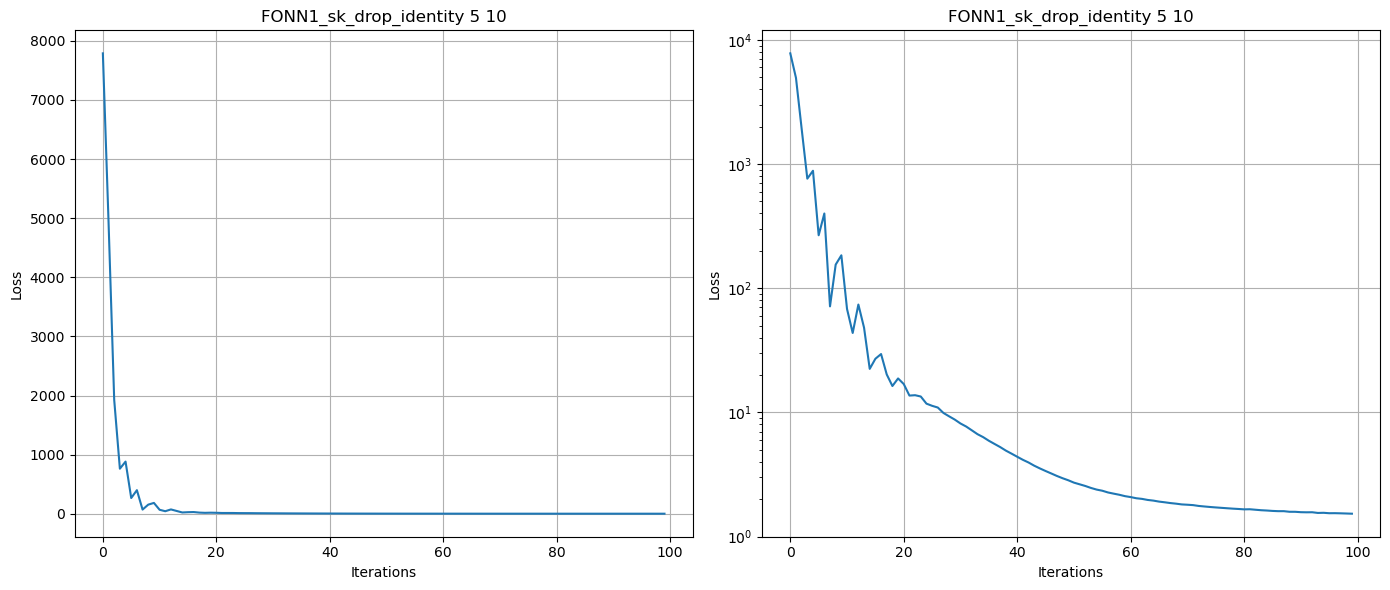

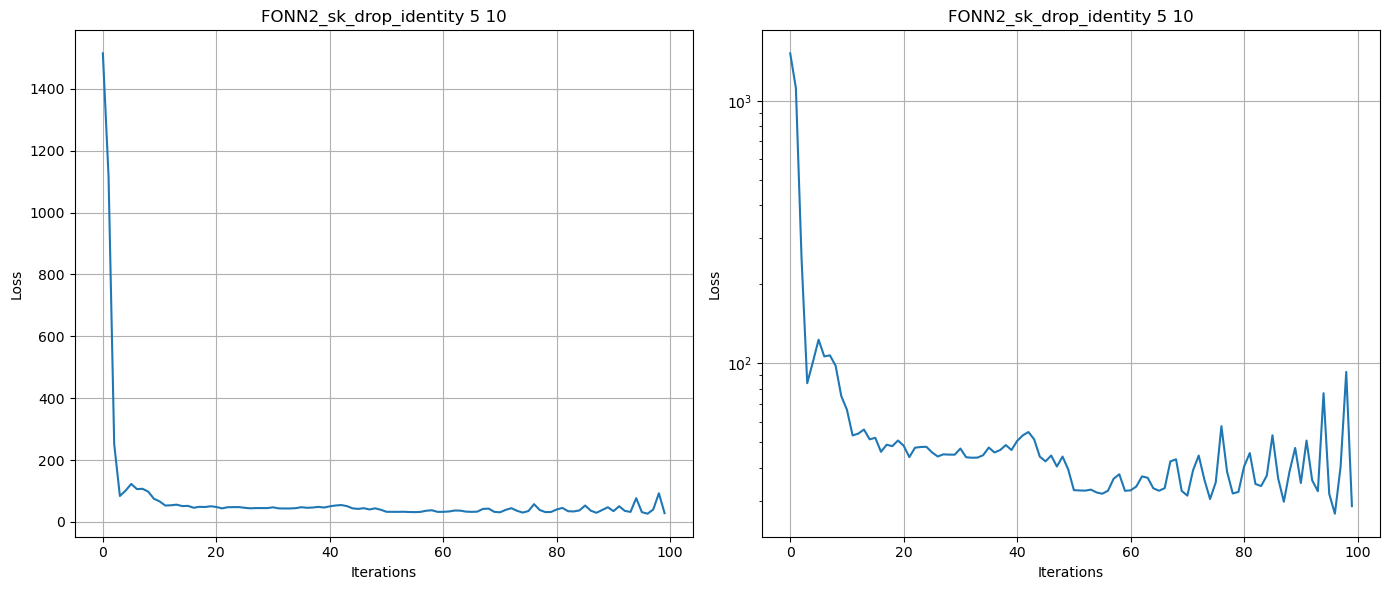

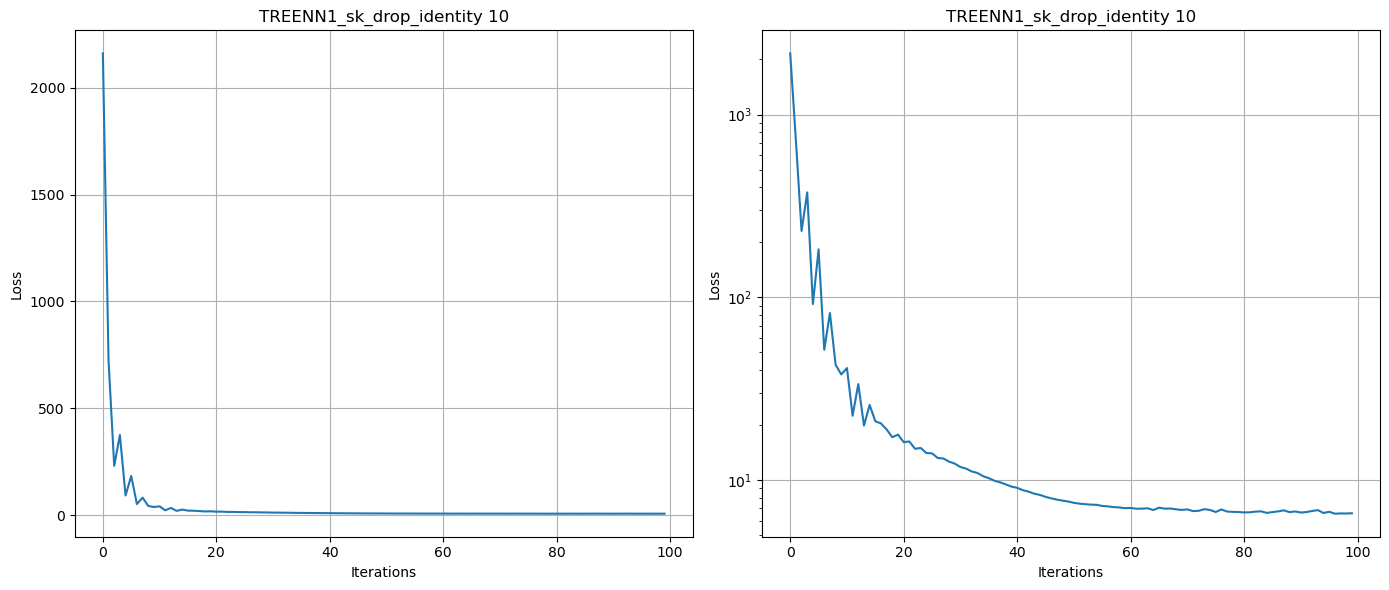

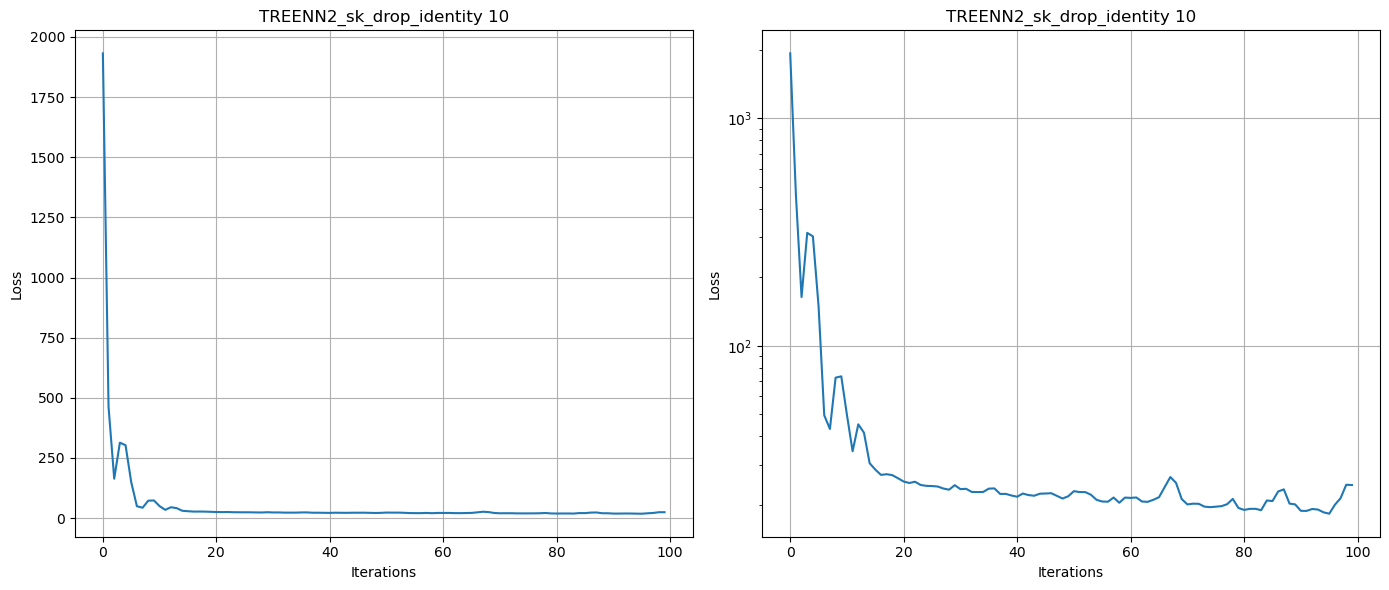

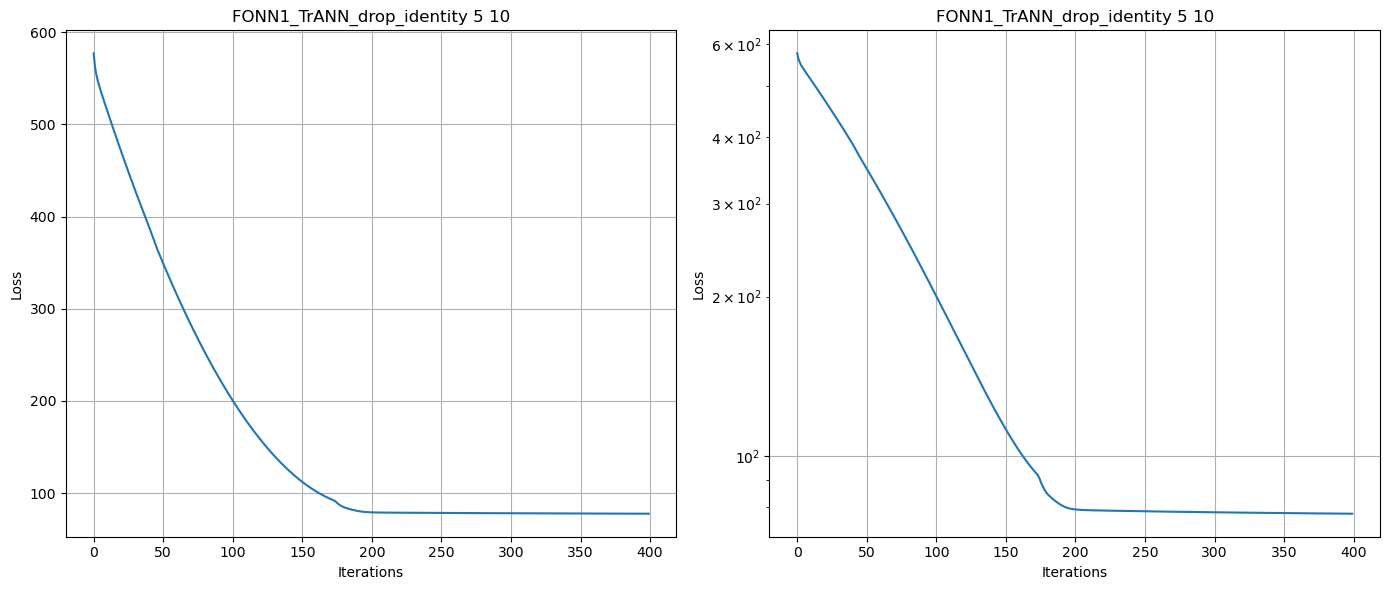

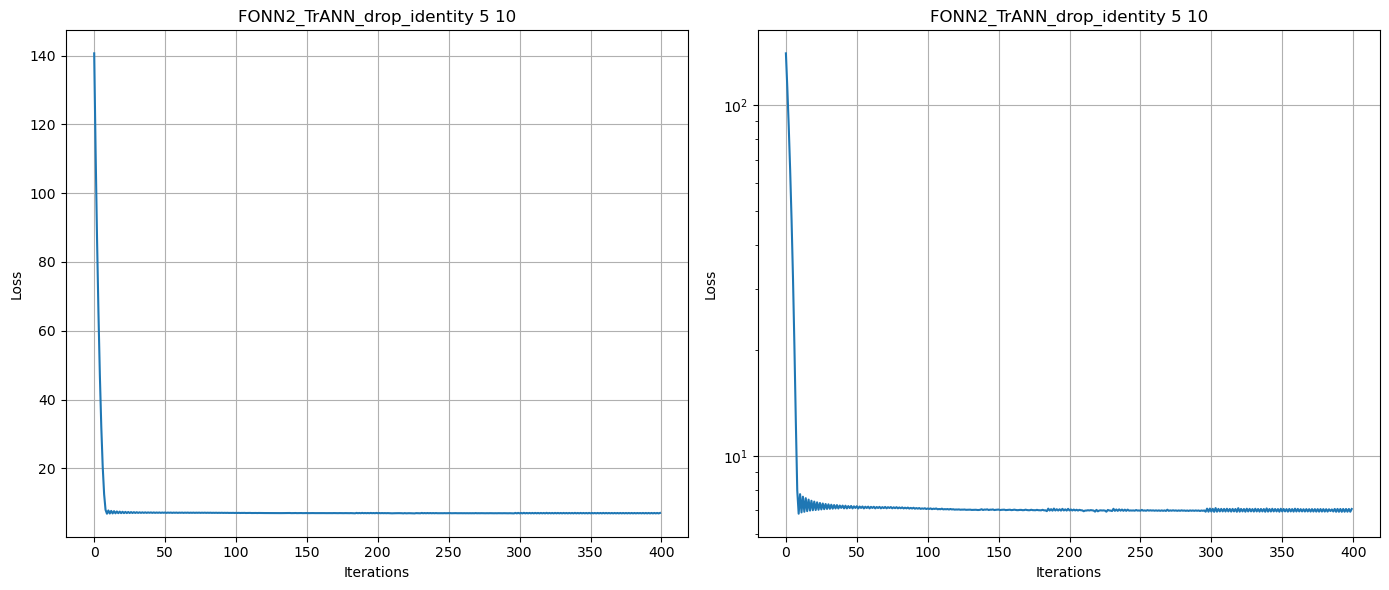

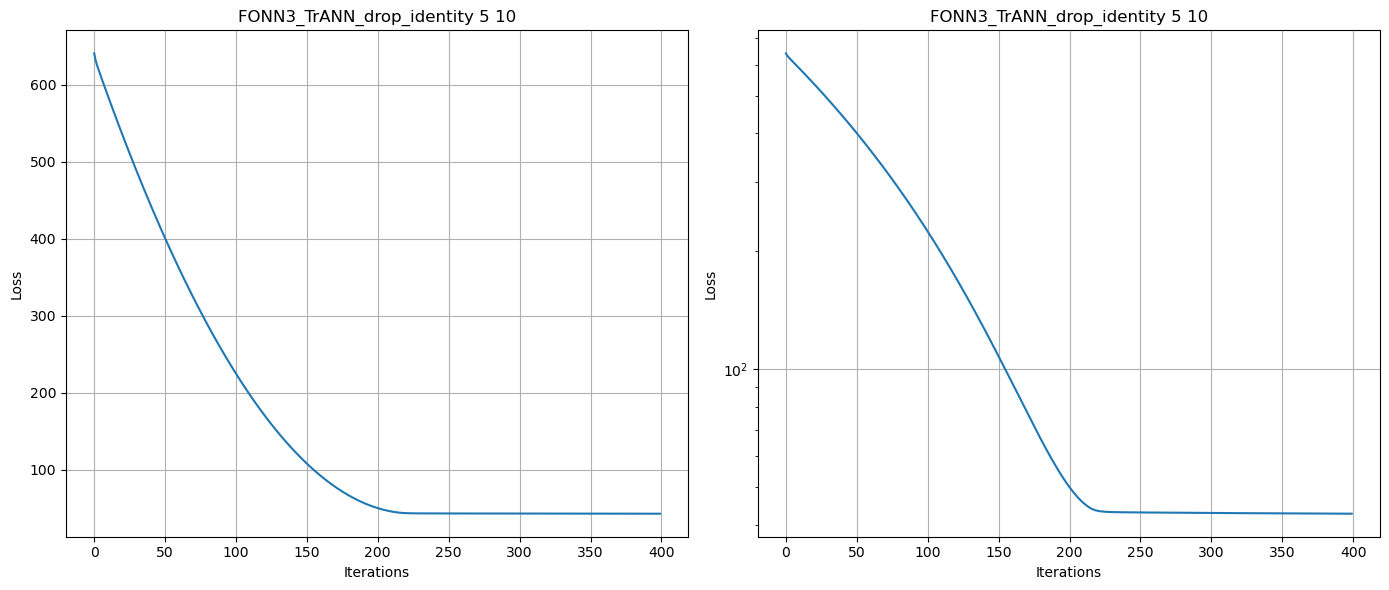

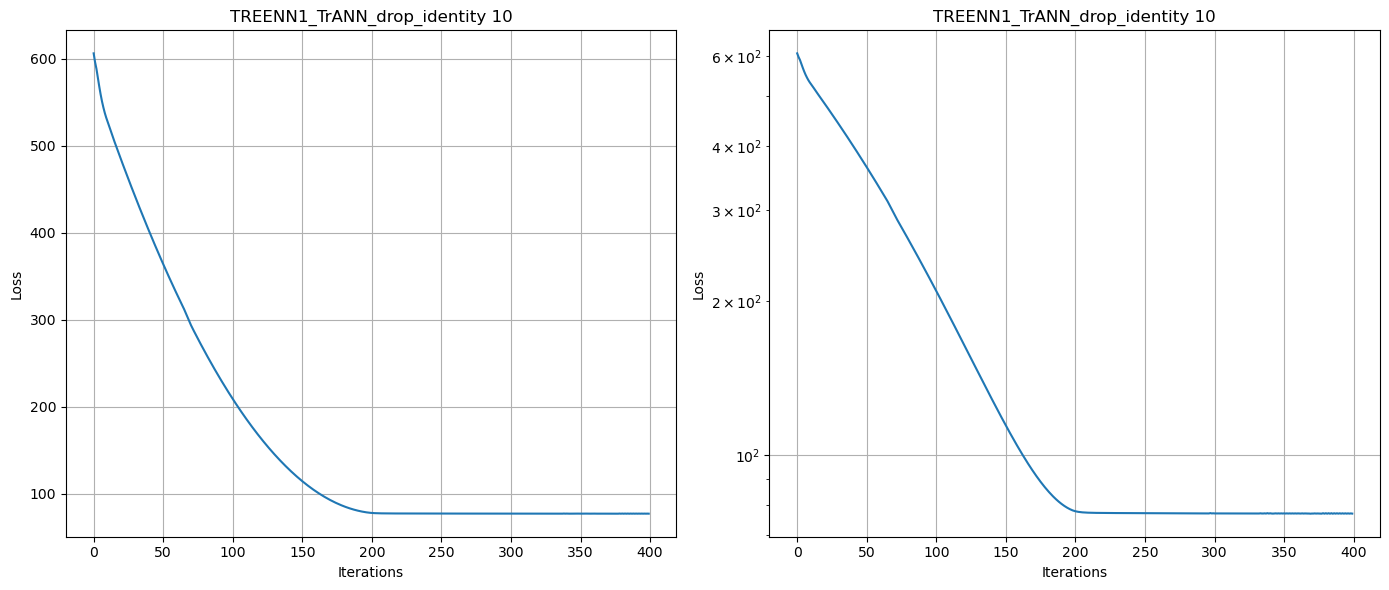

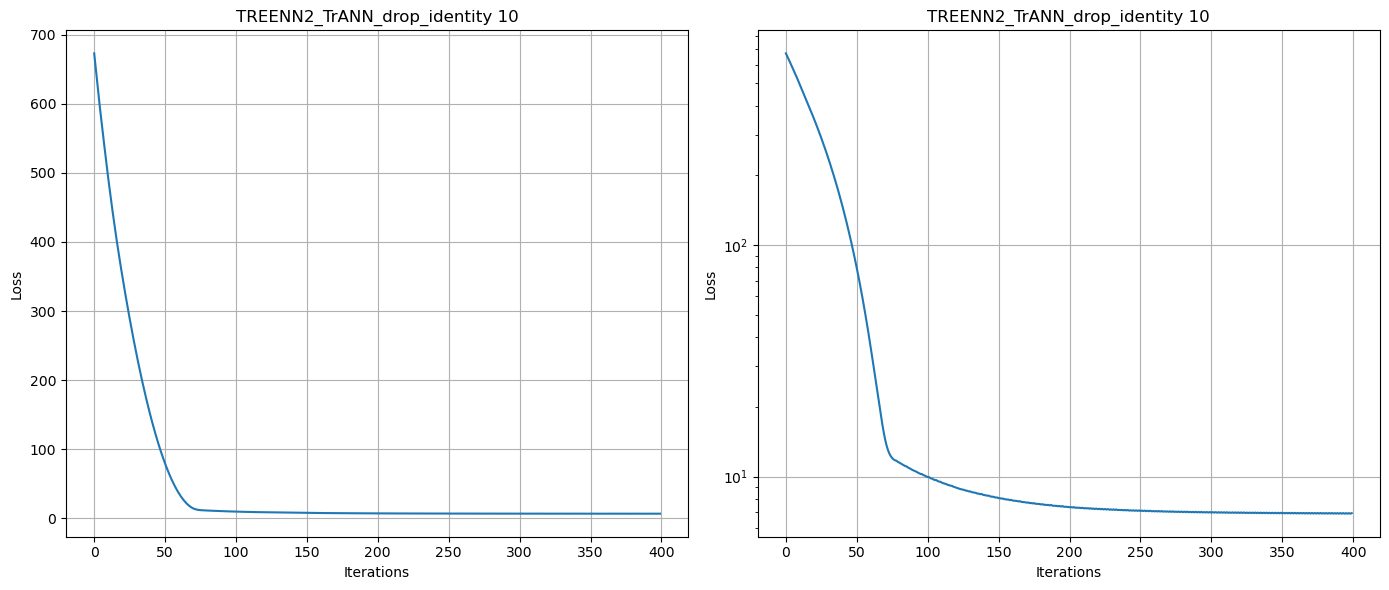

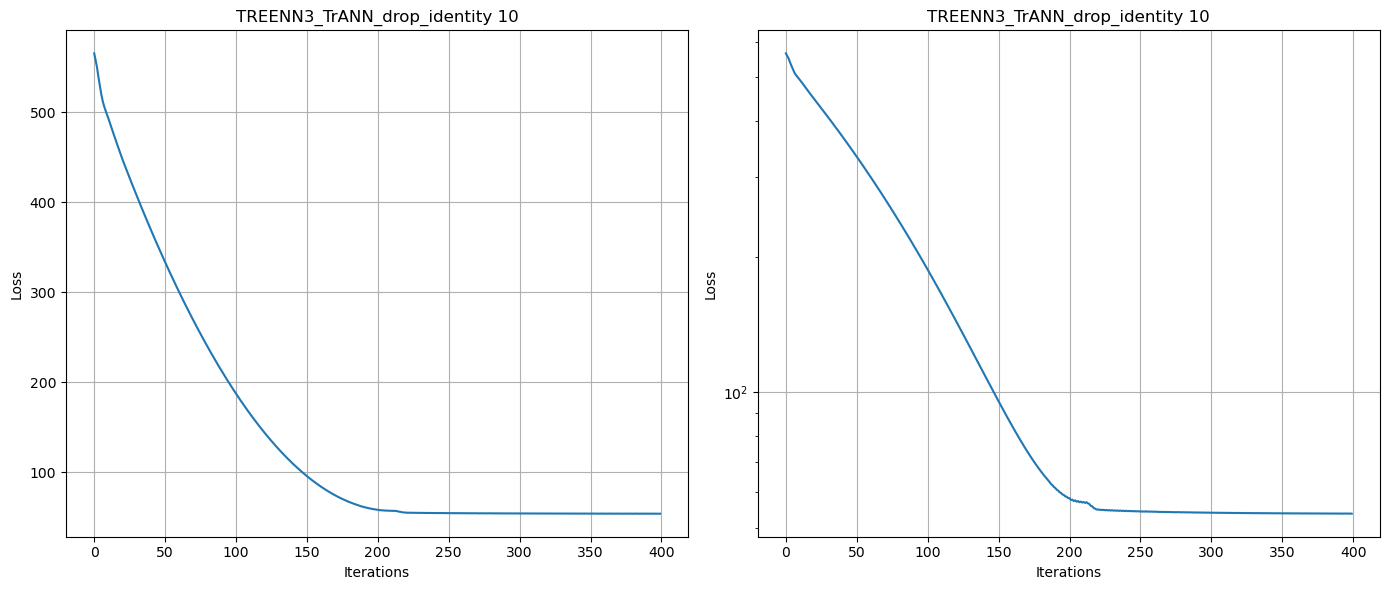

In [21]:
# Plot individual models

for model_name, model in models.items():
    if hasattr(model.best_estimator_["model"], "loss_curve_"):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        plot_loss(model.best_estimator_["model"], ax1, ax2, model_name)
        ax1.set_title(model_name)
        ax2.set_title(model_name)
        fig.tight_layout()
        fig.savefig(f"{output_folder}/models/{model_name}.png")
        fig.show()